# Overview

## Output Files:
- SQGDP9_US_2005_2022.csv
- Aon_US_Damage_2004_to_2022.csv
- Aon_US_Damage_2004_to_2022_dropped.csv
- rsmeans_wtavgs_st.csv
- nationwide_constr_spend_qtr.csv

## BEA Construction Data

### Input:
- SQGDP9_AK_2005_2022.csv
- SQGDP9_AL_2005_2022.csv
- ...
- SQGDP9_WV_2005_2022.csv
- SQGDP9_WY_2005_2022.csv

### Output:
- SQGDP9_US_2005_2022.csv

## AON Damages Data

### Input: 
- Aon Damages by Time Location and Amount 2004 to 2022.xlsx

### Output:  
- Aon_US_Damage_2004_to_2022.csv
- Aon_US_Damage_2004_to_2022_dropped.csv

## RSMeans Data

### Input:
- rsmeans.pkl

### Output:
- rsmeans.csv

## US Construction GDP Data

### Input:
- nationwide_constr_spend.xlsx

### Output:
- nationwide_constr_spend_qtr.csv

## Preliminaries

In [1]:
# set to true to create output files again
create_output_files = False

In [2]:
import pandas as pd
import numpy as np
import re
import glob
import os
import pickle
import datetime

In [3]:
 states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

### Files and Directories

In [4]:
# Base
base_dir = "./Rich"
out_dir = os.path.join(base_dir,"out2")

# BEA
bea_file_fmt = "SQGDP9_{}_2005_2022.csv"
bea_out_file = bea_file_fmt.format('US')

# AON
aon_in_file = "Aon Damages by Time Location and Amount 2004 to 2022.xlsx"
aon_out_file = "Aon_US_Damage_2004_to_2022.csv"
aon_out_file_dropped = "Aon_US_Damage_2004_to_2022_dropped.csv"

# RSMeans
rsm_in_dir = "."
rsm_in_file = "rsmeans.pkl"
rsm_out_file = "rsmeans_wtavgs_st.csv"

# US GDP Construction
gdp_in_file = "nationwide_constr_spend.xlsx"
gdp_out_file = "nationwide_constr_spend_qtr.csv"

## Consolidate BEA Construction Data

In [5]:
dfbea = None
for k in states.keys():
    fp = os.path.join(base_dir,str.format(bea_file_fmt,k))
    df = pd.read_csv(fp)
    df = df[df.Description.notnull()]
    df = df[df.Description.str.match('\s*[Cc]onstruction\s*')]
#    df = df[df.notnull()][df.Description.notnull()][df[df.Description.notnull()].Description.str.match('\s*[Cc]onstruction\s*')]
    if(dfbea is None):
        dfbea = df
    else:
        dfbea = pd.concat([dfbea,df],axis=0)

In [6]:
display(dfbea)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2005:Q1,2005:Q2,...,2019:Q4,2020:Q1,2020:Q2,2020:Q3,2020:Q4,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1
5,"""02000""",Alaska,8.0,SQGDP9,11.0,23,Construction,Millions of chained 2012 dollars,2499.4,2513.9,...,1928.1,1956.6,1710.9,1811.1,1890.3,1757.5,1782.2,1697.3,1612.9,1610.9
5,"""01000""",Alabama,5.0,SQGDP9,11.0,23,Construction,Millions of chained 2012 dollars,9391.6,9310.2,...,7520.5,7365.7,7175.5,7393.2,7713.4,7594.9,7670.4,7389.5,7236.1,7252.4
5,"""05000""",Arkansas,5.0,SQGDP9,11.0,23,Construction,Millions of chained 2012 dollars,5344.6,5282.9,...,3737.6,3684.6,3632.7,3669.9,3817.8,3856.3,3919.2,3723.9,3627.0,3599.9
5,"""04000""",Arizona,6.0,SQGDP9,11.0,23,Construction,Millions of chained 2012 dollars,20937.5,21870.0,...,14214.5,14102.5,14136.5,14402.7,15428.0,14872.5,14894.7,14444.1,14060.7,14002.1
5,"""06000""",California,8.0,SQGDP9,11.0,23,Construction,Millions of chained 2012 dollars,109528.7,111164.3,...,90874.4,89396.9,81124.8,88609.4,90505.1,92128.3,93307.8,89428.0,87432.5,87983.5
5,"""08000""",Colorado,7.0,SQGDP9,11.0,23,Construction,Millions of chained 2012 dollars,16073.5,15687.8,...,17389.6,17285.1,16763.7,16894.1,17436.0,17712.9,17626.7,17080.3,16594.5,16712.3
5,"""09000""",Connecticut,1.0,SQGDP9,11.0,23,Construction,Millions of chained 2012 dollars,9081.8,9065.5,...,5505.4,5594.5,5010.0,5536.0,5755.5,5905.1,5775.6,5601.2,5518.8,5570.5
5,"""11000""",District of Columbia,2.0,SQGDP9,11.0,23,Construction,Millions of chained 2012 dollars,(D),(D),...,1403.7,1418.1,1321.0,1430.1,1445.5,1408.2,1442.4,1389.0,1351.9,1338.8
5,"""10000""",Delaware,2.0,SQGDP9,11.0,23,Construction,Millions of chained 2012 dollars,(D),(D),...,2077.3,2118.6,1911.2,2040.3,2143.5,2124.1,2180.0,2104.1,2053.0,2056.3
5,"""12000""",Florida,5.0,SQGDP9,11.0,23,Construction,Millions of chained 2012 dollars,66734.1,66485.2,...,45723.9,44680.7,44078.6,45781.0,47196.5,46446.4,48264.6,46629.4,45603.9,45595.3


In [7]:
if create_output_files:
    os.makedirs(out_dir,exist_ok=True)
    dfbea.to_csv(os.path.join(out_dir,bea_out_file))

In [8]:
# drop all non-quarter columns
#rexp = re.compile('(?!\d{4}:Q[1-4])')
#rexp = re.compile('(?!\d{4}:Q[1-4])')
#rexp = re.compile('((?!\d{4}:Q[1-4]).)*')
dfbea = dfbea.rename(columns={'GeoName':'State'})
dfbea = dfbea.set_index('State')
rexp = re.compile('^((?!\d{4}:Q[1-4]).)*$')
#print(dfbea.columns.tolist())
#print(list(filter(rexp.search, dfbea.columns.tolist())))
#dropcols = list(filter(rexp.search, dfbea.columns.tolist()))
dfbea = dfbea.drop(columns=list(filter(rexp.search, dfbea.columns.tolist())))
#dfbea = dfbea.set_index('GeoName').drop(columns=['GeoFIPS','Region','TableName','LineCode','IndustryClassification','Description','Unit'])
#dfbea = dfbea.set_index('GeoName').drop(columns=['GeoFIPS','Region','TableName','LineCode','IndustryClassification','Description','Unit'])
#display(dfbea)

In [9]:
#colmap = {}
#for c in dfbea.columns:
#    colmap[c] = c.replace(':','-')
#dfbea = dfbea.rename(columns=colmap)
#display(dfbea)

In [10]:
dfbea = dfbea.stack()
display(dfbea)

State           
Alaska   2005:Q1    2499.4
         2005:Q2    2513.9
         2005:Q3    2465.2
         2005:Q4    2346.8
         2006:Q1    2326.8
                     ...  
Wyoming  2021:Q1    1474.3
         2021:Q2    1549.6
         2021:Q3    1506.8
         2021:Q4    1475.9
         2022:Q1    1491.6
Length: 3519, dtype: object

In [11]:
def process_index(t):
    multi = [t[0]] + t[1].split(':')
    # drop the 'Q' part of quarter (e.g., Q1 -> 1)
    multi[2] = multi[2][1]
    #return [t[0]] + t[1].split(':')
    return tuple(multi)

In [12]:
print(process_index(('Alaska','2005:Q1')))

('Alaska', '2005', '1')


In [13]:
#i = 5
#for k,v in dfbea.iteritems():
#    if i < 0: break
#    print('{}: {}'.format(k,v))
#    i -= 1
#dir(dfbea)
#dir(dfbea)
#help(dfbea.iteritems)
dfbea.index = pd.MultiIndex.from_tuples([process_index(k) for k,v in dfbea.iteritems()], names=('State','Year','Quarter'))
display(dfbea)

State    Year  Quarter
Alaska   2005  1          2499.4
               2          2513.9
               3          2465.2
               4          2346.8
         2006  1          2326.8
                           ...  
Wyoming  2021  1          1474.3
               2          1549.6
               3          1506.8
               4          1475.9
         2022  1          1491.6
Length: 3519, dtype: object

## Split AON Damages Data

In [14]:
dfaon = pd.DataFrame(pd.read_excel(os.path.join(base_dir,"..",aon_in_file),header=2))

In [15]:
display(dfaon)

,Year,Start Date,End Date,Event,Category,Location,Location 2,Location 3,Insured Damages $2022,Total Damages $2022
0,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,"TX, OK,AR, KS, MO, LA, NC, SC, VA, KY",0,0,370.619570,466.263330
1,2004,5/21/2004,5/27/2004,Hailstorm,Severe convective storm,"IA, IL, IN, KS,KY, MI, MO, NC, NE, NY, OH, OK...",0,0,1315.101700,1673.765800
2,2004,5/29/2004,6/2/2004,Severe storm,Severe convective storm,"TX, AR, IL, IN, KS, KY, LA, MN, MO,NE, OK, SD,...",0,0,824.927430,1159.680590
3,2004,6/8/2004,6/9/2004,Severe storm,Severe convective storm,"CO, MI, NY, PA, VT",0,0,848.838370,1195.547000
4,2004,7/12/2004,7/12/2004,Flood,Flood,"PA, NJ, DE, IL, IN, KY, MD, OH, TE, VI, WI",0,0,573.862560,777.105550
...,...,...,...,...,...,...,...,...,...,...
1038,2022,6/11/2022,6/14/2022,Flooding,1,"WA,ID,MT,WY,UT,CO,NM",0,0,54.282256,54.282256
1039,2022,6/16/2022,6/18/2022,Severe Convective Storm,1,"WI,MN,IN,IL,MI,OH","AL,FL,GA,AR,KY,LA,MS,NC,SC,TN","NY,NJ,PA,DE,MD,VA,WV",65.138707,65.138707
1040,2022,6/19/2022,6/21/2022,Severe Convective Storm,1,"ND,SD,NE,KS,OK,TX,MN,IA,MO,AR,LA,WI,IL,MI,IN,O...","WI,MN,IN,IL,MI,OH",0,81.423383,81.423383
1041,2022,6/22/2022,6/23/2022,Severe Convective Storm,1,"NY,NJ,PA,DE,MD,VA,WV","CT,ME,MA,NH,NJ,NY,PA,RI,VT",0,135.705639,135.705639


In [16]:
dfaon2 = dfaon.copy()

In [17]:
def extractStatesByCell(cell):
    return [x.strip()[0:2] for x in (cell.split(',') if type(cell) == str else [])]

In [18]:
affectedStates = dfaon['Location'].apply(func=extractStatesByCell)
affectedStates += dfaon['Location 2'].apply(func=extractStatesByCell)
affectedStates += dfaon['Location 3'].apply(func=extractStatesByCell)
affectedStates = affectedStates.apply(lambda x: list(set(x)))

In [19]:
idx = 5
for state in states.keys():
    dfaon.insert(idx,state,0)
    idx += 1

In [20]:
display(dfaon)

,Year,Start Date,End Date,Event,Category,AK,AL,AR,AZ,CA,...,VT,WA,WI,WV,WY,Location,Location 2,Location 3,Insured Damages $2022,Total Damages $2022
0,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,0,0,0,0,0,...,0,0,0,0,0,"TX, OK,AR, KS, MO, LA, NC, SC, VA, KY",0,0,370.619570,466.263330
1,2004,5/21/2004,5/27/2004,Hailstorm,Severe convective storm,0,0,0,0,0,...,0,0,0,0,0,"IA, IL, IN, KS,KY, MI, MO, NC, NE, NY, OH, OK...",0,0,1315.101700,1673.765800
2,2004,5/29/2004,6/2/2004,Severe storm,Severe convective storm,0,0,0,0,0,...,0,0,0,0,0,"TX, AR, IL, IN, KS, KY, LA, MN, MO,NE, OK, SD,...",0,0,824.927430,1159.680590
3,2004,6/8/2004,6/9/2004,Severe storm,Severe convective storm,0,0,0,0,0,...,0,0,0,0,0,"CO, MI, NY, PA, VT",0,0,848.838370,1195.547000
4,2004,7/12/2004,7/12/2004,Flood,Flood,0,0,0,0,0,...,0,0,0,0,0,"PA, NJ, DE, IL, IN, KY, MD, OH, TE, VI, WI",0,0,573.862560,777.105550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,2022,6/11/2022,6/14/2022,Flooding,1,0,0,0,0,0,...,0,0,0,0,0,"WA,ID,MT,WY,UT,CO,NM",0,0,54.282256,54.282256
1039,2022,6/16/2022,6/18/2022,Severe Convective Storm,1,0,0,0,0,0,...,0,0,0,0,0,"WI,MN,IN,IL,MI,OH","AL,FL,GA,AR,KY,LA,MS,NC,SC,TN","NY,NJ,PA,DE,MD,VA,WV",65.138707,65.138707
1040,2022,6/19/2022,6/21/2022,Severe Convective Storm,1,0,0,0,0,0,...,0,0,0,0,0,"ND,SD,NE,KS,OK,TX,MN,IA,MO,AR,LA,WI,IL,MI,IN,O...","WI,MN,IN,IL,MI,OH",0,81.423383,81.423383
1041,2022,6/22/2022,6/23/2022,Severe Convective Storm,1,0,0,0,0,0,...,0,0,0,0,0,"NY,NJ,PA,DE,MD,VA,WV","CT,ME,MA,NH,NJ,NY,PA,RI,VT",0,135.705639,135.705639


In [21]:
idx = 0
for stateList in affectedStates:
    for state in stateList:
        if(state in states):
            dfaon.at[idx,state] = 1
    idx += 1
display(dfaon)

,Year,Start Date,End Date,Event,Category,AK,AL,AR,AZ,CA,...,VT,WA,WI,WV,WY,Location,Location 2,Location 3,Insured Damages $2022,Total Damages $2022
0,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,0,0,1,0,0,...,0,0,0,0,0,"TX, OK,AR, KS, MO, LA, NC, SC, VA, KY",0,0,370.619570,466.263330
1,2004,5/21/2004,5/27/2004,Hailstorm,Severe convective storm,0,0,0,0,0,...,0,0,1,1,0,"IA, IL, IN, KS,KY, MI, MO, NC, NE, NY, OH, OK...",0,0,1315.101700,1673.765800
2,2004,5/29/2004,6/2/2004,Severe storm,Severe convective storm,0,0,1,0,0,...,0,0,0,1,1,"TX, AR, IL, IN, KS, KY, LA, MN, MO,NE, OK, SD,...",0,0,824.927430,1159.680590
3,2004,6/8/2004,6/9/2004,Severe storm,Severe convective storm,0,0,0,0,0,...,1,0,0,0,0,"CO, MI, NY, PA, VT",0,0,848.838370,1195.547000
4,2004,7/12/2004,7/12/2004,Flood,Flood,0,0,0,0,0,...,0,0,1,0,0,"PA, NJ, DE, IL, IN, KY, MD, OH, TE, VI, WI",0,0,573.862560,777.105550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,2022,6/11/2022,6/14/2022,Flooding,1,0,0,0,0,0,...,0,1,0,0,1,"WA,ID,MT,WY,UT,CO,NM",0,0,54.282256,54.282256
1039,2022,6/16/2022,6/18/2022,Severe Convective Storm,1,0,1,1,0,0,...,0,0,1,1,0,"WI,MN,IN,IL,MI,OH","AL,FL,GA,AR,KY,LA,MS,NC,SC,TN","NY,NJ,PA,DE,MD,VA,WV",65.138707,65.138707
1040,2022,6/19/2022,6/21/2022,Severe Convective Storm,1,0,1,1,0,0,...,0,0,1,1,0,"ND,SD,NE,KS,OK,TX,MN,IA,MO,AR,LA,WI,IL,MI,IN,O...","WI,MN,IN,IL,MI,OH",0,81.423383,81.423383
1041,2022,6/22/2022,6/23/2022,Severe Convective Storm,1,0,0,0,0,0,...,1,0,0,1,0,"NY,NJ,PA,DE,MD,VA,WV","CT,ME,MA,NH,NJ,NY,PA,RI,VT",0,135.705639,135.705639


In [22]:
dfaon.iloc[:,5:5+len(states.keys())].sum(axis=1)
dfaon.insert(len(dfaon.columns),column="states_affected",value=dfaon.iloc[:,5:5+len(states.keys())].sum(axis=1))
display(dfaon)

,Year,Start Date,End Date,Event,Category,AK,AL,AR,AZ,CA,...,WA,WI,WV,WY,Location,Location 2,Location 3,Insured Damages $2022,Total Damages $2022,states_affected
0,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,0,0,1,0,0,...,0,0,0,0,"TX, OK,AR, KS, MO, LA, NC, SC, VA, KY",0,0,370.619570,466.263330,10
1,2004,5/21/2004,5/27/2004,Hailstorm,Severe convective storm,0,0,0,0,0,...,0,1,1,0,"IA, IL, IN, KS,KY, MI, MO, NC, NE, NY, OH, OK...",0,0,1315.101700,1673.765800,18
2,2004,5/29/2004,6/2/2004,Severe storm,Severe convective storm,0,0,1,0,0,...,0,0,1,1,"TX, AR, IL, IN, KS, KY, LA, MN, MO,NE, OK, SD,...",0,0,824.927430,1159.680590,15
3,2004,6/8/2004,6/9/2004,Severe storm,Severe convective storm,0,0,0,0,0,...,0,0,0,0,"CO, MI, NY, PA, VT",0,0,848.838370,1195.547000,5
4,2004,7/12/2004,7/12/2004,Flood,Flood,0,0,0,0,0,...,0,1,0,0,"PA, NJ, DE, IL, IN, KY, MD, OH, TE, VI, WI",0,0,573.862560,777.105550,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,2022,6/11/2022,6/14/2022,Flooding,1,0,0,0,0,0,...,1,0,0,1,"WA,ID,MT,WY,UT,CO,NM",0,0,54.282256,54.282256,7
1039,2022,6/16/2022,6/18/2022,Severe Convective Storm,1,0,1,1,0,0,...,0,1,1,0,"WI,MN,IN,IL,MI,OH","AL,FL,GA,AR,KY,LA,MS,NC,SC,TN","NY,NJ,PA,DE,MD,VA,WV",65.138707,65.138707,23
1040,2022,6/19/2022,6/21/2022,Severe Convective Storm,1,0,1,1,0,0,...,0,1,1,0,"ND,SD,NE,KS,OK,TX,MN,IA,MO,AR,LA,WI,IL,MI,IN,O...","WI,MN,IN,IL,MI,OH",0,81.423383,81.423383,21
1041,2022,6/22/2022,6/23/2022,Severe Convective Storm,1,0,0,0,0,0,...,0,0,1,0,"NY,NJ,PA,DE,MD,VA,WV","CT,ME,MA,NH,NJ,NY,PA,RI,VT",0,135.705639,135.705639,13


In [23]:
srqtridx = pd.DatetimeIndex(pd.to_datetime(dfaon['End Date']))
mnth = srqtridx.month.to_series(index=np.arange(len(srqtridx)))
yr = srqtridx.year.to_series(index=np.arange(len(srqtridx)))
mnth[mnth <= 3]=1
mnth.loc[(mnth > 3) & (mnth <= 6)]=2
mnth.loc[(mnth > 6) & (mnth <= 9)]=3
mnth.loc[mnth > 9]=4
dfaon['Quarter'] = yr.apply(str) + ":Q" + mnth.apply(str)
display(dfaon)

,Year,Start Date,End Date,Event,Category,AK,AL,AR,AZ,CA,...,WI,WV,WY,Location,Location 2,Location 3,Insured Damages $2022,Total Damages $2022,states_affected,Quarter
0,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,0,0,1,0,0,...,0,0,0,"TX, OK,AR, KS, MO, LA, NC, SC, VA, KY",0,0,370.619570,466.263330,10,2004:Q1
1,2004,5/21/2004,5/27/2004,Hailstorm,Severe convective storm,0,0,0,0,0,...,1,1,0,"IA, IL, IN, KS,KY, MI, MO, NC, NE, NY, OH, OK...",0,0,1315.101700,1673.765800,18,2004:Q2
2,2004,5/29/2004,6/2/2004,Severe storm,Severe convective storm,0,0,1,0,0,...,0,1,1,"TX, AR, IL, IN, KS, KY, LA, MN, MO,NE, OK, SD,...",0,0,824.927430,1159.680590,15,2004:Q2
3,2004,6/8/2004,6/9/2004,Severe storm,Severe convective storm,0,0,0,0,0,...,0,0,0,"CO, MI, NY, PA, VT",0,0,848.838370,1195.547000,5,2004:Q2
4,2004,7/12/2004,7/12/2004,Flood,Flood,0,0,0,0,0,...,1,0,0,"PA, NJ, DE, IL, IN, KY, MD, OH, TE, VI, WI",0,0,573.862560,777.105550,9,2004:Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,2022,6/11/2022,6/14/2022,Flooding,1,0,0,0,0,0,...,0,0,1,"WA,ID,MT,WY,UT,CO,NM",0,0,54.282256,54.282256,7,2022:Q2
1039,2022,6/16/2022,6/18/2022,Severe Convective Storm,1,0,1,1,0,0,...,1,1,0,"WI,MN,IN,IL,MI,OH","AL,FL,GA,AR,KY,LA,MS,NC,SC,TN","NY,NJ,PA,DE,MD,VA,WV",65.138707,65.138707,23,2022:Q2
1040,2022,6/19/2022,6/21/2022,Severe Convective Storm,1,0,1,1,0,0,...,1,1,0,"ND,SD,NE,KS,OK,TX,MN,IA,MO,AR,LA,WI,IL,MI,IN,O...","WI,MN,IN,IL,MI,OH",0,81.423383,81.423383,21,2022:Q2
1041,2022,6/22/2022,6/23/2022,Severe Convective Storm,1,0,0,0,0,0,...,0,1,0,"NY,NJ,PA,DE,MD,VA,WV","CT,ME,MA,NH,NJ,NY,PA,RI,VT",0,135.705639,135.705639,13,2022:Q2


In [24]:
dfaon = dfaon.drop(columns=['Location','Location 2','Location 3'])
display(dfaon)

,Year,Start Date,End Date,Event,Category,AK,AL,AR,AZ,CA,...,VA,VT,WA,WI,WV,WY,Insured Damages $2022,Total Damages $2022,states_affected,Quarter
0,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,0,0,1,0,0,...,1,0,0,0,0,0,370.619570,466.263330,10,2004:Q1
1,2004,5/21/2004,5/27/2004,Hailstorm,Severe convective storm,0,0,0,0,0,...,1,0,0,1,1,0,1315.101700,1673.765800,18,2004:Q2
2,2004,5/29/2004,6/2/2004,Severe storm,Severe convective storm,0,0,1,0,0,...,0,0,0,0,1,1,824.927430,1159.680590,15,2004:Q2
3,2004,6/8/2004,6/9/2004,Severe storm,Severe convective storm,0,0,0,0,0,...,0,1,0,0,0,0,848.838370,1195.547000,5,2004:Q2
4,2004,7/12/2004,7/12/2004,Flood,Flood,0,0,0,0,0,...,0,0,0,1,0,0,573.862560,777.105550,9,2004:Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,2022,6/11/2022,6/14/2022,Flooding,1,0,0,0,0,0,...,0,0,1,0,0,1,54.282256,54.282256,7,2022:Q2
1039,2022,6/16/2022,6/18/2022,Severe Convective Storm,1,0,1,1,0,0,...,1,0,0,1,1,0,65.138707,65.138707,23,2022:Q2
1040,2022,6/19/2022,6/21/2022,Severe Convective Storm,1,0,1,1,0,0,...,0,0,0,1,1,0,81.423383,81.423383,21,2022:Q2
1041,2022,6/22/2022,6/23/2022,Severe Convective Storm,1,0,0,0,0,0,...,1,1,0,0,1,0,135.705639,135.705639,13,2022:Q2


In [25]:
dfdrop = dfaon.drop(dfaon[dfaon['states_affected'] > 0].index)
dfaon.drop(dfaon[dfaon['states_affected'] == 0].index, inplace = True)

In [26]:
if create_output_files:
    dfaon.to_csv(os.path.join(out_dir,aon_out_file))
    dfdrop.to_csv(os.path.join(out_dir,aon_out_file_dropped))

In [27]:
dfaon2['State'] = affectedStates
dfaon2 = dfaon2.explode('State')
dfaon2 = dfaon2.drop(columns=['Location','Location 2','Location 3'])
display(dfaon2)

,Year,Start Date,End Date,Event,Category,Insured Damages $2022,Total Damages $2022,State
0,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,KS
0,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,TX
0,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,MO
0,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,VA
0,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,SC
...,...,...,...,...,...,...,...,...
1042,2022,6/23/2022,6/24/2022,Severe Convective Storm,1,81.423383,81.423383,SD
1042,2022,6/23/2022,6/24/2022,Severe Convective Storm,1,81.423383,81.423383,OK
1042,2022,6/23/2022,6/24/2022,Severe Convective Storm,1,81.423383,81.423383,MO
1042,2022,6/23/2022,6/24/2022,Severe Convective Storm,1,81.423383,81.423383,IN


In [28]:
dfaon2 = dfaon2.reset_index(drop=True)
#dfaon2 = dfaon2.drop(columns=['Index'])
display(dfaon2)

,Year,Start Date,End Date,Event,Category,Insured Damages $2022,Total Damages $2022,State
0,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,KS
1,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,TX
2,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,MO
3,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,VA
4,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,SC
...,...,...,...,...,...,...,...,...
10649,2022,6/23/2022,6/24/2022,Severe Convective Storm,1,81.423383,81.423383,SD
10650,2022,6/23/2022,6/24/2022,Severe Convective Storm,1,81.423383,81.423383,OK
10651,2022,6/23/2022,6/24/2022,Severe Convective Storm,1,81.423383,81.423383,MO
10652,2022,6/23/2022,6/24/2022,Severe Convective Storm,1,81.423383,81.423383,IN


In [29]:
srqtridx = pd.DatetimeIndex(pd.to_datetime(dfaon2['End Date']))
mnth = srqtridx.month.to_series(index=np.arange(len(srqtridx)))
yr = srqtridx.year.to_series(index=np.arange(len(srqtridx)))
mnth[mnth <= 3]=1
mnth.loc[(mnth > 3) & (mnth <= 6)]=2
mnth.loc[(mnth > 6) & (mnth <= 9)]=3
mnth.loc[mnth > 9]=4
dfaon2['Quarter'] = mnth
#dfaon['Quarter'] = yr.apply(str) + ":Q" + mnth.apply(str)
display(dfaon2)

,Year,Start Date,End Date,Event,Category,Insured Damages $2022,Total Damages $2022,State,Quarter
0,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,KS,1
1,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,TX,1
2,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,MO,1
3,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,VA,1
4,2004,3/4/2004,3/7/2004,Severe storm,Severe convective storm,370.619570,466.263330,SC,1
...,...,...,...,...,...,...,...,...,...
10649,2022,6/23/2022,6/24/2022,Severe Convective Storm,1,81.423383,81.423383,SD,2
10650,2022,6/23/2022,6/24/2022,Severe Convective Storm,1,81.423383,81.423383,OK,2
10651,2022,6/23/2022,6/24/2022,Severe Convective Storm,1,81.423383,81.423383,MO,2
10652,2022,6/23/2022,6/24/2022,Severe Convective Storm,1,81.423383,81.423383,IN,2


In [30]:
dfaon2.dropna(subset=['State'],inplace=True)

In [31]:
dfaon2 = dfaon2.set_index(keys=['State','Year','Quarter','Event','Category'],drop=True)
display(dfaon2)

,,,,,Start Date,End Date,Insured Damages $2022,Total Damages $2022
State,Year,Quarter,Event,Category,,,,
KS,2004,1,Severe storm,Severe convective storm,3/4/2004,3/7/2004,370.619570,466.263330
TX,2004,1,Severe storm,Severe convective storm,3/4/2004,3/7/2004,370.619570,466.263330
MO,2004,1,Severe storm,Severe convective storm,3/4/2004,3/7/2004,370.619570,466.263330
VA,2004,1,Severe storm,Severe convective storm,3/4/2004,3/7/2004,370.619570,466.263330
SC,2004,1,Severe storm,Severe convective storm,3/4/2004,3/7/2004,370.619570,466.263330
...,...,...,...,...,...,...,...,...
SD,2022,2,Severe Convective Storm,1,6/23/2022,6/24/2022,81.423383,81.423383
OK,2022,2,Severe Convective Storm,1,6/23/2022,6/24/2022,81.423383,81.423383
MO,2022,2,Severe Convective Storm,1,6/23/2022,6/24/2022,81.423383,81.423383


In [32]:
dfstates = pd.DataFrame({'Name':states.values()},index=states.keys())
dfstates.index.name = "State"
dfstates.head()

,Name
State,
AK,Alaska
AL,Alabama
AR,Arkansas
AZ,Arizona
CA,California


In [33]:
dfaon3 = dfaon2.copy()

In [34]:
dfaon2 = dfaon3.copy()

In [35]:
display(dfaon2)
dfstates.head()

,,,,,Start Date,End Date,Insured Damages $2022,Total Damages $2022
State,Year,Quarter,Event,Category,,,,
KS,2004,1,Severe storm,Severe convective storm,3/4/2004,3/7/2004,370.619570,466.263330
TX,2004,1,Severe storm,Severe convective storm,3/4/2004,3/7/2004,370.619570,466.263330
MO,2004,1,Severe storm,Severe convective storm,3/4/2004,3/7/2004,370.619570,466.263330
VA,2004,1,Severe storm,Severe convective storm,3/4/2004,3/7/2004,370.619570,466.263330
SC,2004,1,Severe storm,Severe convective storm,3/4/2004,3/7/2004,370.619570,466.263330
...,...,...,...,...,...,...,...,...
SD,2022,2,Severe Convective Storm,1,6/23/2022,6/24/2022,81.423383,81.423383
OK,2022,2,Severe Convective Storm,1,6/23/2022,6/24/2022,81.423383,81.423383
MO,2022,2,Severe Convective Storm,1,6/23/2022,6/24/2022,81.423383,81.423383


,Name
State,
AK,Alaska
AL,Alabama
AR,Arkansas
AZ,Arizona
CA,California


In [36]:
#left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
#                     'B': ['B0', 'B1', 'B2']},
#                    index=pd.Index(['K0', 'K1', 'K2'], name='key'))
#
#index = pd.MultiIndex.from_tuples([('K0', 'Y0'), ('K1', 'Y1'),
#                                   ('K2', 'Y2'), ('K2', 'Y3')],
#                                  names=['key', 'Y'])
#
#right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
#                      'D': ['D0', 'D1', 'D2', 'D3']},
#                     index=index)
#
#result = left.join(right, how='inner')
#display(left)
#display(right)
#display(result)

In [37]:
#dfaon2.index = dfaon2.index.dropna()
#display(dfstates)
#display(dfaon2)

In [38]:
#pd.merge(dfaon2,dfstates,left_on='State',right_on='State',how='left')
dfaon2 = dfstates.join(dfaon2,how='inner')
display(dfaon2)

,,,,,Name,Start Date,End Date,Insured Damages $2022,Total Damages $2022
State,Year,Quarter,Event,Category,,,,,
KS,2004,1,Severe storm,Severe convective storm,Kansas,3/4/2004,3/7/2004,370.619570,466.263330
TX,2004,1,Severe storm,Severe convective storm,Texas,3/4/2004,3/7/2004,370.619570,466.263330
MO,2004,1,Severe storm,Severe convective storm,Missouri,3/4/2004,3/7/2004,370.619570,466.263330
VA,2004,1,Severe storm,Severe convective storm,Virginia,3/4/2004,3/7/2004,370.619570,466.263330
SC,2004,1,Severe storm,Severe convective storm,South Carolina,3/4/2004,3/7/2004,370.619570,466.263330
...,...,...,...,...,...,...,...,...,...
SD,2022,2,Severe Convective Storm,1,South Dakota,6/23/2022,6/24/2022,81.423383,81.423383
OK,2022,2,Severe Convective Storm,1,Oklahoma,6/23/2022,6/24/2022,81.423383,81.423383
MO,2022,2,Severe Convective Storm,1,Missouri,6/23/2022,6/24/2022,81.423383,81.423383


In [39]:
#dfaon2.merge(dfstates,left_on=dfaon2.index.get_level_values('State'),right_on=dfstates.index.get_level_values('State'))
dfaon2 = dfaon2.reset_index()
#display(dfaon2)
dfaon2 = dfaon2.drop(columns=['State'])
dfaon2 = dfaon2.rename(columns={'Name':'State'})
#display(dfaon2)
dfaon2 = dfaon2.set_index(keys=['State','Year','Quarter','Event','Category'],drop=True)
#dfaon2 = dfaon2.sort_index(['State','Year','Quarter'])
dfaon2.sort_index(inplace=True)
display(dfaon2)

Start Date  \
State   Year Quarter Event                        Category                             
Alabama 2004 3       Hurricane Jeanne             Tropical Cyclone         9/14/2004   
        2005 1       Severe storm                 Severe convective storm  3/22/2005   
             3       Hurricane Dennis (July 2005) Tropical Cyclone          7/9/2005   
                     Hurricane Katrina            Tropical Cyclone         8/25/2005   
                     Hurricane Rita               Tropical Cyclone         9/20/2005   
...                                                                              ...   
Wyoming 2020 3       Severe Weather               Severe convective storm   7/2/2020   
        2021 1       Severe Weather               Severe convective storm      44354   
                     Winter Weather               Winter Storms                44267   
        2022 1        Winter Weather              1                         2/1/2022   
             2        Flooding                    1                        6/11/2022   

                                                                            End Date  \
State   Year Quarter Event                        Category                             
Alabama 2004 3       Hurricane Jeanne             Tropical Cyclone         9/29/2004   
        2005 1       Severe storm                 Severe convective storm  3/28/2005   
             3       Hurricane Dennis (July 2005) Tropical Cyclone         7/11/2005   
                     Hurricane Katrina            Tropical Cyclone         8/30/2005   
                     Hurricane Rita               Tropical Cyclone         9/24/2005   
...                                                                              ...   
Wyoming 2020 3       Severe Weather               Severe convective storm  7/10/2020   
        2021 1       Severe Weather               Severe convective storm      44357   
                     Winter Weather               Winter Storms                44270   
        2022 1        Winter Weather              1                         2/5/2022   
             2        Flooding                    1                        6/14/2022   

                                                                           Insured Damages $2022  \
State   Year Quarter Event                        Category                                         
Alabama 2004 3       Hurricane Jeanne             Tropical Cyclone                   7890.610200   
        2005 1       Severe storm                 Severe convective storm             992.304010   
             3       Hurricane Dennis (July 2005) Tropical Cyclone                      0.000000   
                     Hurricane Katrina            Tropical Cyclone                  90742.017300   
                     Hurricane Rita               Tropical Cyclone                  14346.564000   
...                                                                                          ...   
Wyoming 2020 3       Severe Weather               Severe convective storm             133.744011   
        2021 1       Severe Weather               Severe convective storm              43.723776   
                     Winter Weather               Winter Storms                        57.554860   
        2022 1        Winter Weather              1                                   564.112787   
             2        Flooding                    1                                    54.282256   

                                                                           Total Damages $2022  
State   Year Quarter Event                        Category                                      
Alabama 2004 3       Hurricane Jeanne             Tropical Cyclone                14346.564000  
        2005 1       Severe storm                 Severe convective storm          1554.211100  
             3       Hurricane Dennis (July 2005) Tropical Cyclone                    0.000000 

In [40]:
dfaon2.sum(axis=1,numeric_only=True)

State    Year  Quarter  Event                         Category               
Alabama  2004  3        Hurricane Jeanne              Tropical Cyclone            22237.174200
         2005  1        Severe storm                  Severe convective storm      2546.515110
               3        Hurricane Dennis (July 2005)  Tropical Cyclone                0.000000
                        Hurricane Katrina             Tropical Cyclone           278442.896300
                        Hurricane Rita                Tropical Cyclone            38377.058700
                                                                                     ...      
Wyoming  2020  3        Severe Weather                Severe convective storm       319.760303
         2021  1        Severe Weather                Severe convective storm        98.723776
                        Winter Weather                Winter Storms                 140.054860
         2022  1         Winter Weather               1            

In [41]:
dfaon2.groupby('State').sum()

,Insured Damages $2022,Total Damages $2022
State,,
Alabama,308347.819755,506490.812054
Alaska,2848.124718,2905.684716
Arizona,41828.319185,37964.827296
Arkansas,213556.034897,294538.946608
California,114816.260990,119085.336549
Colorado,104111.468824,143060.494869
Connecticut,93139.834419,161077.613467
Delaware,93571.649886,167229.122096
District of Columbia,12695.527055,5263.561875


In [42]:
dfaon2.groupby(['State','Year']).sum()

Insured Damages $2022  Total Damages $2022
State   Year                                            
Alabama 2004            7890.610200         14346.564000
        2005          106080.885310        213285.584800
        2006            1912.875200          2689.980750
        2007             705.372730          6611.374910
        2008            5296.093003         17244.655546
...                             ...                  ...
Wyoming 2018            2278.619831          2998.512102
        2019            6286.951601          9396.632468
        2020             850.722603          1183.217565
        2021             101.278637           137.500000
        2022             618.395043           618.395043

[893 rows x 2 columns]

## Process RSMeans

In [43]:
with open(os.path.join(rsm_in_dir,rsm_in_file),"rb") as f:
    dfrsm = pickle.load(f)
display(dfrsm)

,Code,Cost Category,Type,Index,County,State,Year,Quarter
0,15433,CONTRACTOR EQUIPMENT,MAT.,0.0,NATIONAL AVERAGE,UNITED STATES,2007,1
1,"0241, 31 - 34","SITE & INFRASTRUCTURE, DEMOLITION",MAT.,100.0,NATIONAL AVERAGE,UNITED STATES,2007,1
2,310,Concrete Forming & Accessories,MAT.,100.0,NATIONAL AVERAGE,UNITED STATES,2007,1
3,320,Concrete Reinforcing,MAT.,100.0,NATIONAL AVERAGE,UNITED STATES,2007,1
4,330,Cast-in-Place Concrete,MAT.,100.0,NATIONAL AVERAGE,UNITED STATES,2007,1
...,...,...,...,...,...,...,...,...
355,9,FINISHES,TOTAL,122.1,"YELLOWKNIFE, NWT",CANADA,2021,4
356,COVERS,"DIVS. 10 - 14, 25, 28, 41, 43, 44, 46",TOTAL,133.0,"YELLOWKNIFE, NWT",CANADA,2021,4
357,"21, 22, 23","FIRE SUPPRESSION, PLUMBING & HVAC",TOTAL,98.4,"YELLOWKNIFE, NWT",CANADA,2021,4
358,"26, 27, 3370","ELECTRICAL, COMMUNICATIONS & UTIL.",TOTAL,123.9,"YELLOWKNIFE, NWT",CANADA,2021,4


In [44]:
#no DCf
#dfrsm[dfrsm.State.str.contains('.*COLU.*')]

In [45]:
#dfrsm['State']
#display(dfrsm[dfrsm['State'] != 'CANADA'])
#[state.upper() for state in states.values()]
#df[pd.DataFrame(df.species.tolist()).isin(selection).any(1).values]
#dfrsm[pd.DataFrame(dfrsm.State.tolist()).isin([state.upper() for state in states.values()]).any(1).values]

In [46]:
dfrsm = dfrsm[pd.DataFrame(dfrsm.State.tolist()).isin([state.upper() for state in states.values()]).any(1).values]
display(dfrsm)

,Code,Cost Category,Type,Index,County,State,Year,Quarter
60,15433,CONTRACTOR EQUIPMENT,MAT.,0.0,ANNISTON,ALABAMA,2007,1
61,"0241, 31 - 34","SITE & INFRASTRUCTURE, DEMOLITION",MAT.,93.7,ANNISTON,ALABAMA,2007,1
62,310,Concrete Forming & Accessories,MAT.,94.7,ANNISTON,ALABAMA,2007,1
63,320,Concrete Reinforcing,MAT.,93.6,ANNISTON,ALABAMA,2007,1
64,330,Cast-in-Place Concrete,MAT.,91.4,ANNISTON,ALABAMA,2007,1
...,...,...,...,...,...,...,...,...
235,9,FINISHES,TOTAL,84.6,YELLOWSTONE NAT’L PA,WYOMING,2021,4
236,COVERS,"DIVS. 10 - 14, 25, 28, 41, 43, 44, 46",TOTAL,113.5,YELLOWSTONE NAT’L PA,WYOMING,2021,4
237,"21, 22, 23","FIRE SUPPRESSION, PLUMBING & HVAC",TOTAL,86.5,YELLOWSTONE NAT’L PA,WYOMING,2021,4
238,"26, 27, 3370","ELECTRICAL, COMMUNICATIONS & UTIL.",TOTAL,87.6,YELLOWSTONE NAT’L PA,WYOMING,2021,4


In [47]:
#dfst = dfrsm[pd.DataFrame(dfrsm.State.tolist()).isin([state.upper() for state in states.values()]).any(1).values]
#display(dfst)

In [48]:
def get_state_rsm(df, state=None):
    dfret = df[df['Cost Category']=='WEIGHTED AVERAGE'].copy()
    if state is not None:
        dfret = dfret[dfret['State']==state]
    dfret.drop(columns=['Code','Cost Category'],inplace=True)
    dfret.reset_index(inplace=True,drop=True)
    dfret.set_index(inplace=True,keys=['State','Year','Quarter','Type','County'])
    dfret.sort_index(inplace=True)
    dfret.rename(columns={'Index':'GDP_Index'},inplace=True)
    return dfret

In [49]:
#dfrsm_al = dfrsm[dfrsm['State']=='ALABAMA' & dfrsm['Cost Category']=='WEIGHTED AVERAGE'].drop(columns=['Code',''])
#dfrsm_tx = dfrsm[dfrsm['State']=='TEXAS']

dfrsm_al = get_state_rsm(dfrsm,'ALABAMA')
dfrsm_tx = get_state_rsm(dfrsm,'TEXAS')
dfrsm_all = get_state_rsm(dfrsm)

In [50]:
display(dfrsm[dfrsm['State']=='DIST OF COLUMBIA'])

,Code,Cost Category,Type,Index,County,State,Year,Quarter


In [51]:
display(dfrsm_al)
#display(dfrsm[dfrsm['State']=='ALABAMA'])
if create_output_files:
    dfrsm_al.to_csv(os.path.join(out_dir,'alabama.csv'))
    #dfrsm[dfrsm['State']=='ALABAMA'].to_csv(os.path.join(out_dir,'alabama.csv'))

GDP_Index
State   Year Quarter Type  County               
ALABAMA 2007 1       INST. ANNISTON         55.9
                           BIRMINGHAM       79.7
                           BUTLER           58.7
                           DECATUR          63.5
                           DOTHAN           55.2
...                                          ...
        2021 4       TOTAL MOBILE           96.6
                           MONTGOMERY       98.2
                           PHENIX CITY      96.5
                           SELMA            96.1
                           TUSCALOOSA       98.0

[2520 rows x 1 columns]

In [52]:
#display(dfrsm[dfrsm['State']=='TEXAS'])
display(dfrsm_tx)
if create_output_files:
    dfrsm_tx.to_csv(os.path.join(out_dir,'texas.csv'))
    #dfrsm[dfrsm['State']=='TEXAS'].to_csv(os.path.join(out_dir,'texas.csv'))

GDP_Index
State Year Quarter Type  County                 
TEXAS 2007 1       INST. ABILENE            52.3
                         AMARILLO           57.3
                         AUSTIN             60.3
                         BEAUMONT           62.5
                         BROWNWOOD          38.4
...                                          ...
      2021 4       TOTAL VICTORIA           91.8
                         WACO               93.0
                         WAXAHACHIE         93.6
                         WHARTON            92.2
                         WICHITA FALLS      92.5

[6840 rows x 1 columns]

In [53]:
#dfrsmdebug = dfrsm.copy()

In [54]:
#dfrsm = dfrsmdebug.copy()
display(dfrsm)

,Code,Cost Category,Type,Index,County,State,Year,Quarter
60,15433,CONTRACTOR EQUIPMENT,MAT.,0.0,ANNISTON,ALABAMA,2007,1
61,"0241, 31 - 34","SITE & INFRASTRUCTURE, DEMOLITION",MAT.,93.7,ANNISTON,ALABAMA,2007,1
62,310,Concrete Forming & Accessories,MAT.,94.7,ANNISTON,ALABAMA,2007,1
63,320,Concrete Reinforcing,MAT.,93.6,ANNISTON,ALABAMA,2007,1
64,330,Cast-in-Place Concrete,MAT.,91.4,ANNISTON,ALABAMA,2007,1
...,...,...,...,...,...,...,...,...
235,9,FINISHES,TOTAL,84.6,YELLOWSTONE NAT’L PA,WYOMING,2021,4
236,COVERS,"DIVS. 10 - 14, 25, 28, 41, 43, 44, 46",TOTAL,113.5,YELLOWSTONE NAT’L PA,WYOMING,2021,4
237,"21, 22, 23","FIRE SUPPRESSION, PLUMBING & HVAC",TOTAL,86.5,YELLOWSTONE NAT’L PA,WYOMING,2021,4
238,"26, 27, 3370","ELECTRICAL, COMMUNICATIONS & UTIL.",TOTAL,87.6,YELLOWSTONE NAT’L PA,WYOMING,2021,4


In [55]:
#dfrsm = dfrsm[dfrsm['Cost Category']=='WEIGHTED AVERAGE']
#dfrsm.drop(['Code','Cost Category','County'],axis=1,inplace=True)
#dfrsm.reset_index(drop=True,inplace=True)
#dfrsm.set_index(keys=['State','Year','Quarter','Type'],drop=True,inplace=True)
#dfrsm.rename(columns={'Index':'GDP_Index'},inplace=True)
#grprsm = dfrsm.groupby(['State','Year','Quarter','Type'],axis=0)

grprsm = dfrsm_all.groupby(['State','Year','Quarter','Type'],axis=0)
dfrsm = grprsm.mean()
display(dfrsm)

GDP_Index
State   Year Quarter Type             
ALABAMA 2007 1       INST.   63.221429
                     MAT.    98.542857
                     TOTAL   83.300000
             2       INST.   63.221429
                     MAT.    99.135714
...                                ...
WYOMING 2021 3       MAT.   113.550000
                     TOTAL   95.990000
             4       INST.   73.000000
                     MAT.   119.550000
                     TOTAL   99.430000

[9000 rows x 1 columns]

In [56]:
dfrsm_summary = dfrsm.copy()
dfrsm_summary.reset_index(inplace=True)
dfrsm_summary['Yr-Qtr'] = dfrsm_summary['Year'] + "-Q" + dfrsm_summary['Quarter']
dfrsm_summary.drop(columns=['Year','Quarter'],inplace=True)
dfrsm_summary.set_index(keys=['State','Type'],inplace=True)
display(dfrsm_summary)

GDP_Index   Yr-Qtr
State   Type                      
ALABAMA INST.   63.221429  2007-Q1
        MAT.    98.542857  2007-Q1
        TOTAL   83.300000  2007-Q1
        INST.   63.221429  2007-Q2
        MAT.    99.135714  2007-Q2
...                   ...      ...
WYOMING MAT.   113.550000  2021-Q3
        TOTAL   95.990000  2021-Q3
        INST.   73.000000  2021-Q4
        MAT.   119.550000  2021-Q4
        TOTAL   99.430000  2021-Q4

[9000 rows x 2 columns]

In [57]:
dfrsm_summary.reset_index(inplace=True)
dfrsm_summary = dfrsm_summary.pivot(columns='Yr-Qtr',values='GDP_Index',index=['State','Type'])
#dfrsm_summary = dfrsm_summary.pivot(columns='Yr-Qtr',values='GDP_Index')
dfrsm_summary.reset_index(inplace=True)
#display(dfrsm_summary)

In [58]:
#grprsm = dfrsm.groupby(['State','Year','Quarter','Type'],axis=0)
#grprsm.mean()

In [59]:
# dftx = dfst[dfst['State']=='TEXAS' \
#                       and dfst[dfst['Cost Category']=='WEIGHTED AVERAGE']]
#dftx = dfst[dfst['State']=='TEXAS']
#dftx = dfst.copy()
#dftx = dftx[dftx['Cost Category']=='WEIGHTED AVERAGE']
#dftx = dftx[dftx['State']=='TEXAS']
#dftx = dftx[(dftx['State']=='TEXAS') & (dftx['Year']=='2007') & (dftx['Quarter']=='1')]
#dftx.drop(['Code','Cost Category','County','State','Year','Quarter'],axis=1,inplace=True)
#dftx.drop(['Code','Cost Category','County'],axis=1,inplace=True)
#dftx = dftx.drop(['Code','Cost Category','County'],axis=1)
#grptx = dftx.groupby('Type',axis=0)
#grpus = dftx.groupby(['Type','State','Year','Quarter'],axis=0)
#grptx.mean()
#grpus.mean()
#dftx[dftx['Type']=='TOTAL'].mean()
#display(dftx)
#grptx


#dftx = dfst.copy()
#dftx = dftx[dftx['Cost Category']=='WEIGHTED AVERAGE']
#dftx = dftx.drop(['Code','Cost Category','County'],axis=1)
#grpus = dftx.groupby(['Type','State','Year','Quarter'],axis=0)

#dfus = dfst.copy()
#dfus = dfus[dfus['Cost Category']=='WEIGHTED AVERAGE']
#dfus = dfus.drop(['Code','Cost Category','County'],axis=1)
#dfgdppct = grpus.mean().copy()
#dfgdppct = dfgdppct.rename(columns={'Index':'GDPPct'})
#display(dfgdppct)

In [60]:
#dfus = dfst.copy()
#dfus = dfus[dfus['Cost Category']=='WEIGHTED AVERAGE']
#dfus = dfus.drop(['Code','Cost Category','County'],axis=1)
#dfus['Yr-Qtr'] = dfus['Year'] + "-Q" + dfus['Quarter']
##display(dfus['Quarter'])
#dfus = dfus.drop(['Year','Quarter'],axis=1)
##display(dfus)
#grpus = dfus.groupby(['Type','State','Yr-Qtr'],axis=0,as_index=False) # as_index flattens the group by more like sql
#dfgdppct = grpus.mean().copy()
#dfgdppct = dfgdppct.rename(columns={'Index':'GDPPct'})
#grpus = grpus.mean()
#display(dfgdppct)

In [61]:
##grpus['Year-Quarter'] = grpus['Year']+grpus['Quarter']
##grpus.Index[0]
##print(grpus.Index[0])
##display(grpus.shape)
##display(type(grpus))
##display(grpus)
#grpuspiv = grpus.pivot(columns='Yr-Qtr',values='Index',index=['State','Type'])
#grpuspiv.reset_index(inplace=True)
#display(grpuspiv)
##display(grpus.Index)
##display(grpus.Rows)
##dfst['Yr-Qtr'] = dfst['Year'] + "-Q" + dfst['Quarter']
##display(dfst)
##print(dfst.loc[[99]])
##for (method, group) in grpus:
#    #print(method)
#    #print(group.shape)
##    print(group)
#    #print("{0:30s} shape={1}".format(method, group.shape))
##for val in grpus:
##    print(val)
##grpus.mean()

In [62]:
display(dfrsm_summary)
if create_output_files:
    dfrsm_summary.to_csv(os.path.join(out_dir,rsm_out_file))
    #grpuspiv.to_csv(os.path.join(out_dir,rsm_out_file))

Yr-Qtr,State,Type,2007-Q1,2007-Q2,2007-Q3,2007-Q4,2008-Q1,2008-Q2,2008-Q3,2008-Q4,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4
0,ALABAMA,INST.,63.221429,63.221429,63.221429,63.221429,61.085714,61.085714,61.085714,63.200000,...,72.457143,72.750000,71.157143,71.614286,72.507143,72.571429,70.485714,70.750000,71.242857,71.635714
1,ALABAMA,MAT.,98.542857,99.135714,101.307143,101.942857,97.021429,99.135714,105.642857,108.114286,...,101.785714,102.371429,97.185714,97.664286,96.414286,97.064286,97.442857,99.157143,111.964286,116.385714
2,ALABAMA,TOTAL,83.300000,83.628571,84.850000,85.228571,81.650000,82.864286,86.585714,88.907143,...,89.214286,89.664286,86.178571,86.671429,86.321429,86.714286,85.792857,86.878571,94.357143,97.050000
3,ALASKA,INST.,117.425000,117.600000,117.600000,118.425000,114.300000,114.300000,114.300000,120.175000,...,116.150000,115.950000,113.925000,113.925000,114.675000,114.750000,110.975000,111.200000,112.200000,112.750000
4,ALASKA,MAT.,136.650000,137.850000,140.125000,140.500000,133.475000,135.450000,142.075000,145.300000,...,127.000000,128.175000,122.100000,122.725000,121.700000,122.125000,122.450000,124.050000,137.550000,144.925000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,WISCONSIN,MAT.,99.926667,100.986667,102.980000,103.700000,98.886667,100.713333,106.180000,108.753333,...,102.373333,102.540000,97.173333,97.286667,96.100000,96.560000,96.926667,98.493333,108.500000,113.873333
146,WISCONSIN,TOTAL,98.506667,100.606667,101.900000,102.293333,98.053333,99.133333,102.346667,104.313333,...,101.046667,101.180000,98.546667,99.400000,98.866667,99.126667,97.800000,98.820000,104.793333,107.873333
147,WYOMING,INST.,60.540000,60.540000,62.100000,62.100000,60.030000,60.030000,60.030000,60.030000,...,72.250000,72.130000,70.420000,73.140000,73.990000,74.010000,71.530000,72.090000,72.910000,73.000000
148,WYOMING,MAT.,101.540000,102.520000,104.530000,105.370000,100.190000,102.020000,108.170000,110.760000,...,106.350000,106.830000,101.080000,101.180000,100.030000,100.730000,101.290000,102.840000,113.550000,119.550000


In [63]:
#display(dfrsm)
display(dfrsm.reset_index())
if create_output_files:
    dfrsm.reset_index().to_csv(os.path.join(out_dir,"wtavg_state.csv"))
    #grpus.mean().to_csv(os.path.join(out_dir,"wtavg_state.csv"))

,State,Year,Quarter,Type,GDP_Index
0,ALABAMA,2007,1,INST.,63.221429
1,ALABAMA,2007,1,MAT.,98.542857
2,ALABAMA,2007,1,TOTAL,83.300000
3,ALABAMA,2007,2,INST.,63.221429
4,ALABAMA,2007,2,MAT.,99.135714
...,...,...,...,...,...
8995,WYOMING,2021,3,MAT.,113.550000
8996,WYOMING,2021,3,TOTAL,95.990000
8997,WYOMING,2021,4,INST.,73.000000
8998,WYOMING,2021,4,MAT.,119.550000


In [64]:
display(dfrsm_al.groupby(['State','Year','Quarter','Type'],axis=0).mean())
if create_output_files:
    dfrsm_al.groupby(['State','Year','Quarter','Type'],axis=0).mean().to_csv(os.path.join(out_dir,"al_wtavg.csv"))

GDP_Index
State   Year Quarter Type             
ALABAMA 2007 1       INST.   63.221429
                     MAT.    98.542857
                     TOTAL   83.300000
             2       INST.   63.221429
                     MAT.    99.135714
...                                ...
        2021 3       MAT.   111.964286
                     TOTAL   94.357143
             4       INST.   71.635714
                     MAT.   116.385714
                     TOTAL   97.050000

[180 rows x 1 columns]

In [65]:
display(dfrsm_tx.groupby(['State','Year','Quarter','Type'],axis=0).mean())
if create_output_files:
    dfrsm_tx.groupby(['State','Year','Quarter','Type'],axis=0).mean().to_csv(os.path.join(out_dir,"tx_wtavg.csv"))

GDP_Index
State Year Quarter Type             
TEXAS 2007 1       INST.   51.715789
                   MAT.    99.878947
                   TOTAL   79.068421
           2       INST.   52.144737
                   MAT.   100.536842
...                              ...
      2021 3       MAT.   109.892105
                   TOTAL   89.365789
           4       INST.   62.847368
                   MAT.   115.581579
                   TOTAL   92.805263

[180 rows x 1 columns]

## Visualization

In [66]:
%matplotlib inline

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [68]:
display(dfrsm)
display(dfrsm_tx)
display(dfrsm_tx.groupby(['State','Year','Quarter','Type'],axis=0).mean())

GDP_Index
State   Year Quarter Type             
ALABAMA 2007 1       INST.   63.221429
                     MAT.    98.542857
                     TOTAL   83.300000
             2       INST.   63.221429
                     MAT.    99.135714
...                                ...
WYOMING 2021 3       MAT.   113.550000
                     TOTAL   95.990000
             4       INST.   73.000000
                     MAT.   119.550000
                     TOTAL   99.430000

[9000 rows x 1 columns]

GDP_Index
State Year Quarter Type  County                 
TEXAS 2007 1       INST. ABILENE            52.3
                         AMARILLO           57.3
                         AUSTIN             60.3
                         BEAUMONT           62.5
                         BROWNWOOD          38.4
...                                          ...
      2021 4       TOTAL VICTORIA           91.8
                         WACO               93.0
                         WAXAHACHIE         93.6
                         WHARTON            92.2
                         WICHITA FALLS      92.5

[6840 rows x 1 columns]

GDP_Index
State Year Quarter Type             
TEXAS 2007 1       INST.   51.715789
                   MAT.    99.878947
                   TOTAL   79.068421
           2       INST.   52.144737
                   MAT.   100.536842
...                              ...
      2021 3       MAT.   109.892105
                   TOTAL   89.365789
           4       INST.   62.847368
                   MAT.   115.581579
                   TOTAL   92.805263

[180 rows x 1 columns]

In [69]:
# todo:
# optionally connect quarters
# climate events for specified state, year + hard-coded height
# position climate event height at line
# make events transparent
# color code event by type
def plot_state_gdp(df, df2, state, constr_type='INST.', save=False, name=None, text_color='red',
                   mindam=None, maxdam=None, quarter=None):
    #display(get_state_rsm(df,state.upper()))
    df = get_state_rsm(df,state.upper())
    constr_type = constr_type.upper()
    if constr_type == 'INST' or constr_type == 'MAT':
        constr_type += '.'
    elif constr_type == 'TOT':
        constr_type = 'TOTAL'
    df = df.loc[(slice(None),slice(None),slice(None), constr_type), :]
    df = df.groupby(['State','Year','Quarter','Type'],axis=0).mean()
    df.reset_index(inplace=True)
    #display(df)
    fig = plt.figure(figsize=(16,8))
    #plt.plot((df.Year + '-Q' + df.Quarter).replace(to_replace='-Q1',value='',regex=True),df.GDP_Index)
    
    lines = []
    #if quarter is not None:
    #    plt.plot((df.Year + '-Q' + df.Quarter).replace(to_replace='-Q1',value='',regex=True),df.GDP_Index)
    #    #df = df[df.Quarter==str(quarter)]

        
    if quarter is None:
        plt.plot((df.Year + '-Q' + df.Quarter).replace(to_replace='-Q1',value='',regex=True),df.GDP_Index)
    else:
        lines = plt.plot((df.Year + '-Q' + df.Quarter).replace(to_replace='-Q1',value='',regex=True),df.GDP_Index) 
        if str(quarter) == '1':
            #plt.plot(df.Year,df.GDP_Index)
            lines += plt.plot(df[df.Quarter=='1'].Year,df[df.Quarter=='1'].GDP_Index)
        else:
            #plt.plot(df.Year+'-Q'+df.Quarter,df.GDP_Index)
            quarter = str(quarter)
            lines += plt.plot(df[df.Quarter==quarter].Year+'-Q'+df[df.Quarter==quarter].Quarter,
                              df[df.Quarter==quarter].GDP_Index)
    #lines = []
    #lines += plt.plot((df.Year + '-Q' + df.Quarter).replace(to_replace='-Q1',value='',regex=True),df.GDP_Index)
    #lines += plt.plot(df[df.Quarter=='1'].Year,df[df.Quarter=='1'].GDP_Index)
    #lines += plt.plot(df[df.Quarter=='2'].Year+'-Q'+df[df.Quarter=='2'].Quarter,df[df.Quarter=='2'].GDP_Index)
    #lines += plt.plot(df[df.Quarter=='3'].Year+'-Q'+df[df.Quarter=='3'].Quarter,df[df.Quarter=='3'].GDP_Index)
    #lines += plt.plot(df[df.Quarter=='4'].Year+'-Q'+df[df.Quarter=='4'].Quarter,df[df.Quarter=='4'].GDP_Index)
    
    
    #q1_inst = grptx.loc[(slice(None),slice(None),'1', 'INST.'), :]

    ax = plt.gca()
    if quarter is not None:
        legendfontsize = 14.0
        ax.legend(lines,['All',F"Q{quarter}"],loc='upper left',frameon=False,prop={"size":legendfontsize})
#    ax.legend(lines,['All','Q1','Q2','Q3','Q4'],loc='upper left',frameon=False)
#    style = dict(size=10, color=line_color)
#    ax.text('2008',60,'Ike',ha='center',**style)
#    ax.text('2017',60,'Harvey',ha='center',**style)
#    

    tmp = dfaon2.reset_index()
    #display(tmp)
    tmp = tmp.loc[tmp['Total Damages $2022'] > 5000]
    #display(tmp)
    tmp.drop(['Event','Category','Start Date','End Date'], axis=1, inplace=True)
    #tmp = tmp.loc[tmp['Total Damages $2022'] > 0]
    #display(tmp)
    #display(df2.reset_index())
    tmp = df2.reset_index()
    #display(tmp)
    #tmp = tmp.loc[(tmp != 0).all(axis=1), :]
    #display(tmp[tmp.State==state])
    #print(max(tmp[tmp.State==state]['Total Damages $2022']))
    #print(min(tmp[tmp.State==state]['Total Damages $2022']))
    tmp = tmp[tmp.State==state]
    #display(tmp[tmp.Year>=2007])
    #display(tmp[tmp.Year<=2021])
    #display(tmp[tmp.Year>=2007 and tmp.Year<=2021])
    tmp = tmp[(tmp.Year>=2007) & (tmp.Year<=2021)]
    #display(tmp)
    #print(max(tmp['Total Damages $2022']))
    #print(min(tmp['Total Damages $2022']))
    
    #tmp2 = df[(df.Year=='2009') & (df.Quarter=='2')]
    #print(tmp2['GDP_Index'].squeeze())
    #print(F"{df[df.Year==2009 & df.Quarter==2]}")
    
    titlefontsize = 16.0
    xlabelfontsize = 13.0
    ylabelfontsize = 13.0

    plt.xlabel("Year",fontdict={'fontsize': xlabelfontsize})
    plt.ylabel("% National GDP",fontdict={'fontsize': ylabelfontsize})
    plt.title(F"Disaster Cost Impact on {state} Construction {constr_type}" 
              + (" GDP" if quarter is None else F" Q{quarter} GDP"),
              fontdict={'fontsize': titlefontsize})
    #plt.title(F"Disaster Cost Impact on {state} Construction {constr_type} GDP",fontdict={'fontsize': titlefontsize})
    
    
    
    #print('rows')
    style = dict(size=10, color=text_color)
    for index, row in tmp.iterrows():
        qtr = row['Quarter']
        yr = row['Year']
        #display(qtr)
        #display(yr)
        #if yr < 2007 or yr > 2021: continue
        #print(F"{str(yr)} {str(qtr)}")
        gdp = df[(df.Year==str(yr)) & (df.Quarter==str(qtr))]['GDP_Index'].squeeze()
        tmp8 = row['Total Damages $2022']
        smin=5
        smax=100
        if mindam is not None and maxdam is not None:
            tmp9 = (tmp8-mindam)/(maxdam-mindam)
            s = tmp9*(smax-smin) + smin
        else:
            rng = smax-smin
            #s = 40 if tmp8 > 10000 else 30 if tmp8 > 7500 else 50 if tmp8 > 6000 else 10 
            s = (.75*rng+smin) if tmp8 > 10000 else (.5*rng+smin) if tmp8 > 7500 else smax if tmp8 > 6000 else smin 
        #print(s)
        #print(F"{yr}-Q{qtr}: {tmp3}")
        #ax.text(F"{yr}" if qtr==1 else F"{yr}-Q{qtr}",
        #        gdp,row['Event'],ha='center',**style)
        plt.plot(F"{yr}" if qtr==1 else F"{yr}-Q{qtr}",gdp,'ro',markersize=s,alpha=0.8)
    
    
    i=0
    for label in ax.axes.xaxis.get_ticklabels():
        if i%4 != 0:
            label.set_visible(False)
        i += 1


In [70]:
def initialize_rsmdata():
    with open(os.path.join(rsm_in_dir,rsm_in_file),"rb") as f:
        df = pickle.load(f)
    return df[pd.DataFrame(df.State.tolist()).isin([state.upper() for state in states.values()]).any(1).values]

In [71]:
def initialize_aondata():
    return dfaon2.groupby(["State","Year","Quarter"]).sum()

In [72]:
df = initialize_rsmdata()

In [73]:
df2 = initialize_aondata()

In [74]:
#display(df2)
#display(get_state_rsm(df,"NEW YORK"))
#display(dfaon2.head())
#display(df2.head())
#len(df2) #2632
#len(dfaon2) #10522
#len(df) #2358000
#yr = 2008
#qtr = 4
#gdp = df[(df.Year==str(yr)) & (df.Quarter==str(qtr))]['GDP_Index'].squeeze()
#display(gdp)
#tmp98 = df2.reset_index()
#tmp98 = tmp98[tmp98.State=='New York']
#tmp98 = tmp98[(tmp98.Year>=2007) & (tmp98.Year<=2021)]
#tmp98 = tmp98[tmp98.Quarter==1]
#display(tmp98.head())
#tmp99 = get_state_rsm(df,'New York'.upper())
#tmp99 = df.copy()
#tmp99 = tmp99.reset_index()
#tmp99 = tmp99[tmp99.State=='New York'.upper()]
#tmp99 = tmp99[(tmp99.Year>='2007') & (tmp99.Year<='2021')]
#tmp99 = tmp99[tmp99.Quarter=='1']
#display(df.head())
#display(tmp99.head())
#display(df2.reset_index()[(df2.reset_index()['Quarter']==1) & (df2.reset_index()['State']=='Alabama')])

constr_type = 'inst'
state='New York'
tmp99 = get_state_rsm(df,state.upper())
constr_type = constr_type.upper()
if constr_type == 'INST' or constr_type == 'MAT':
    constr_type += '.'
elif constr_type == 'TOT':
    constr_type = 'TOTAL'
tmp99 = tmp99.loc[(slice(None),slice(None),slice(None), constr_type), :]
tmp99 = tmp99.groupby(['State','Year','Quarter','Type'],axis=0).mean()
tmp99.reset_index(inplace=True)
tmp99 = tmp99[tmp99.Quarter=='1']
display(tmp99)


# lines = []
# lines += plt.plot(q1_inst.index.get_level_values('Year'),q1_inst['GDP_Index'])
# lines += plt.plot(q2_inst.index.get_level_values('Year'),q2_inst['GDP_Index'])
# lines += plt.plot(q3_inst.index.get_level_values('Year'),q3_inst['GDP_Index'])
# lines += plt.plot(q4_inst.index.get_level_values('Year'),q4_inst['GDP_Index'])
# plt.xlabel("Year",fontdict={'fontsize': xlabelfontsize})
# plt.ylabel("% National GDP",fontdict={'fontsize': ylabelfontsize})
# plt.title("Texas Inst. % National GDP 1st Quarter",fontdict={'fontsize': titlefontsize})
# ax = plt.gca()
# style = dict(size=10, color='red')
# ax.text('2008',55,'Ike',ha='center',**style)
# ax.text('2017',60,'Harvey',ha='center',**style)
# ax.legend(lines,['Q1','Q2','Q3','Q4'],loc='upper left',frameon=False)


,State,Year,Quarter,Type,GDP_Index
0,NEW YORK,2007,1,INST.,125.603125
4,NEW YORK,2008,1,INST.,128.109375
8,NEW YORK,2009,1,INST.,126.906250
12,NEW YORK,2010,1,INST.,127.143750
16,NEW YORK,2011,1,INST.,126.528125
20,NEW YORK,2012,1,INST.,128.081250
24,NEW YORK,2013,1,INST.,128.828125
28,NEW YORK,2014,1,INST.,128.700000
32,NEW YORK,2015,1,INST.,130.478125
36,NEW YORK,2016,1,INST.,131.087500


In [75]:
#display(df2)

In [76]:
#display(dfaon2.reset_index().Category.unique())
#display(dfaon2.reset_index().Event.unique())
display(dfaon2.reset_index()[dfaon2.reset_index().Category==1].Event.unique())
display(dfaon2.reset_index()[dfaon2.reset_index().Category==0].Event.unique())

array([' Severe Convective Storm', ' Winter Weather', ' Flooding'],
      dtype=object)

array([' Severe Convective Storm', ' Wildfire', ' Flooding'], dtype=object)

In [77]:
#dfaon2.groupby(["State","Year","Quarter"]).sum()
df2[df2['Total Damages $2022']>0]['Total Damages $2022'].max()

211731.3737

In [78]:
mindamage=df2[df2['Total Damages $2022']>0]['Total Damages $2022'].min()
maxdamage=df2[df2['Total Damages $2022']>0]['Total Damages $2022'].max()

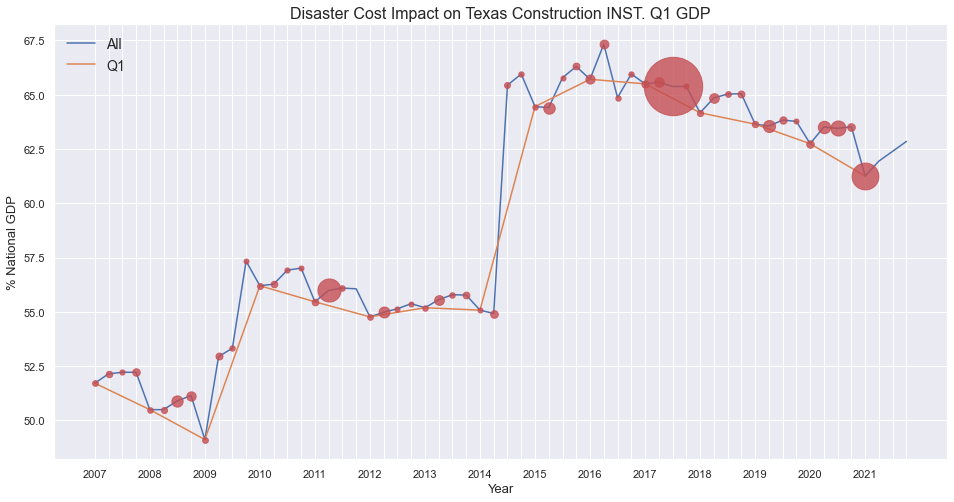

In [79]:
plot_state_gdp(df,df2,'Texas',mindam=mindamage,maxdam=maxdamage,quarter='1')
#plot_state_gdp(df,df2,'New York',mindam=mindamage,maxdam=maxdamage)

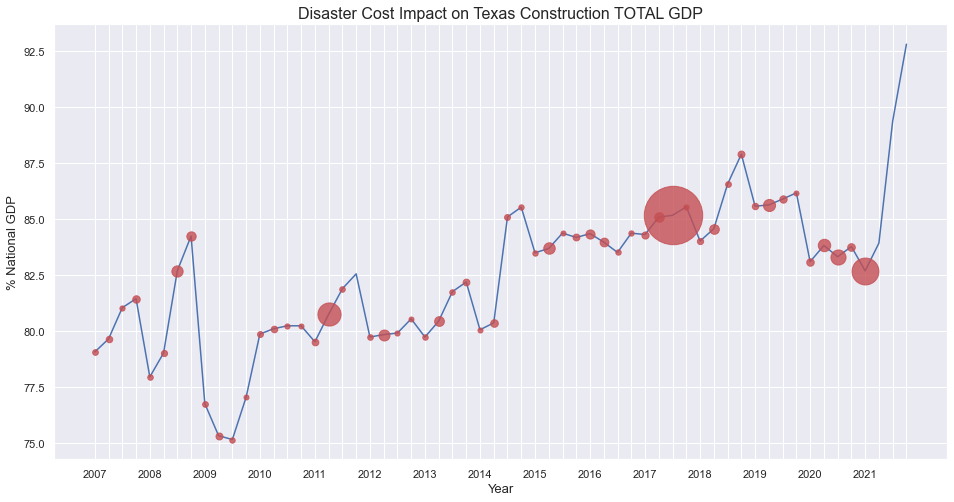

In [80]:
#plot_state_gdp(df,df2,'Texas','mat')
plot_state_gdp(df,df2,'Texas','total',mindam=mindamage,maxdam=maxdamage)
#plot_state_gdp(df,df2,'Texas','inst')

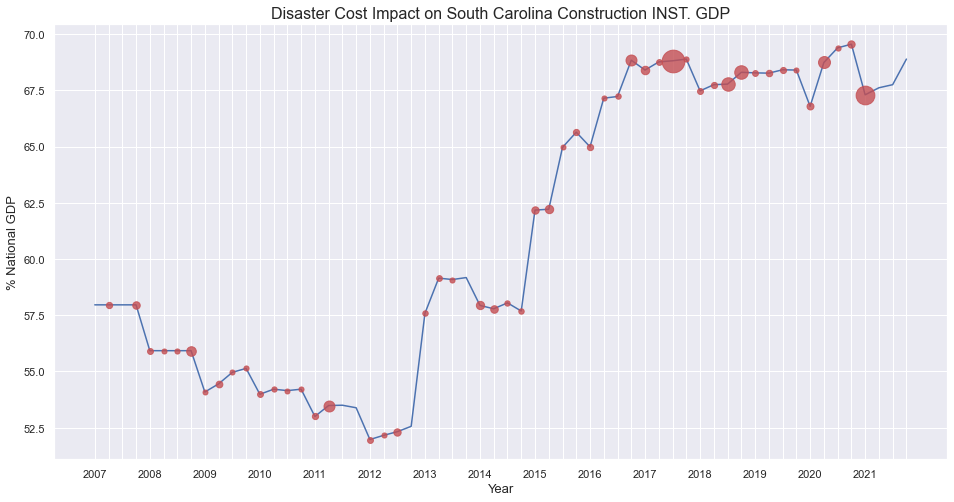

In [81]:
plot_state_gdp(df,df2,'South Carolina',mindam=mindamage,maxdam=maxdamage)

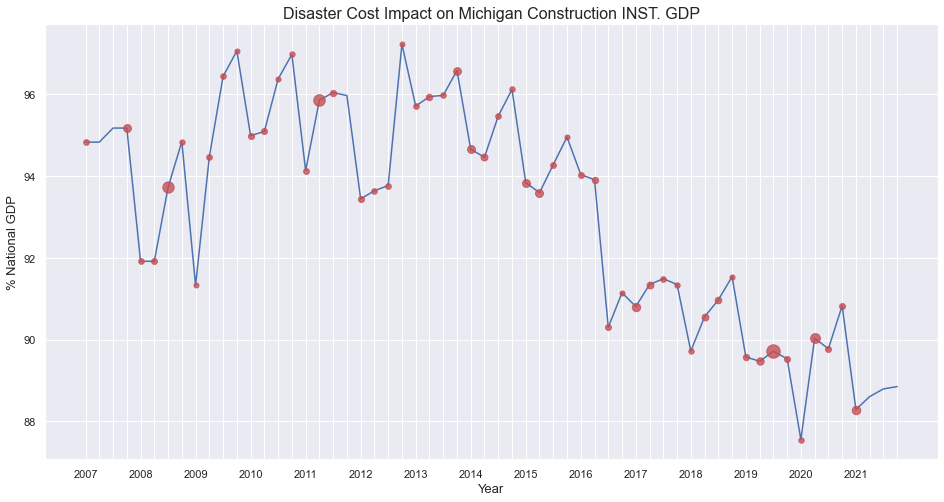

In [82]:
plot_state_gdp(df,df2,'Michigan',mindam=mindamage,maxdam=maxdamage)

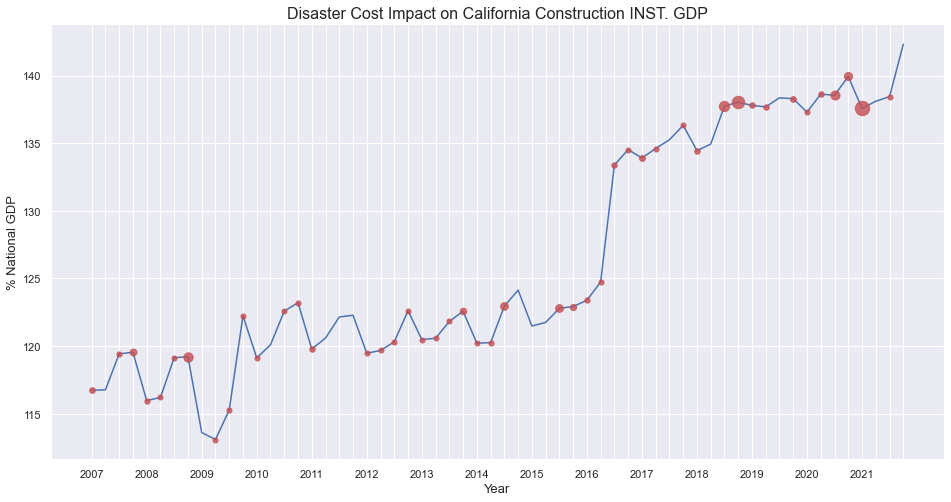

In [83]:
plot_state_gdp(df,df2,'California',mindam=mindamage,maxdam=maxdamage)

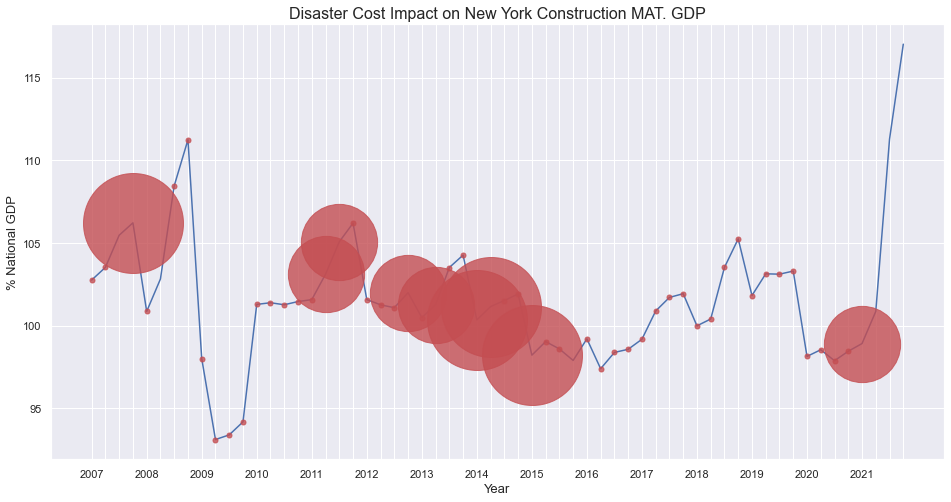

In [84]:
plot_state_gdp(df,df2,'New York','mat')

In [85]:
# plot_state_gdp(df, 'Texas', 'inst')

In [86]:
#display(dfaon2[dfaon2['State']=='Alabama'])
#tmp = dfaon2.reset_index()
#tmp = tmp.loc[tmp['Total Damages $2022'] > 10000]
##tmp = tmp.loc[(tmp != 0).all(axis=1), :]
#display(tmp[tmp.State=='Alabama'])
#print(max(tmp[tmp.State=='Alabama']['Total Damages $2022']))
#print(min(tmp[tmp.State=='Alabama']['Total Damages $2022']))

In [87]:
grptx = dfrsm_tx.groupby(['State','Year','Quarter','Type'],axis=0).mean()

In [88]:
display(dfaon2)

Start Date  \
State   Year Quarter Event                        Category                             
Alabama 2004 3       Hurricane Jeanne             Tropical Cyclone         9/14/2004   
        2005 1       Severe storm                 Severe convective storm  3/22/2005   
             3       Hurricane Dennis (July 2005) Tropical Cyclone          7/9/2005   
                     Hurricane Katrina            Tropical Cyclone         8/25/2005   
                     Hurricane Rita               Tropical Cyclone         9/20/2005   
...                                                                              ...   
Wyoming 2020 3       Severe Weather               Severe convective storm   7/2/2020   
        2021 1       Severe Weather               Severe convective storm      44354   
                     Winter Weather               Winter Storms                44267   
        2022 1        Winter Weather              1                         2/1/2022   
             2        Flooding                    1                        6/11/2022   

                                                                            End Date  \
State   Year Quarter Event                        Category                             
Alabama 2004 3       Hurricane Jeanne             Tropical Cyclone         9/29/2004   
        2005 1       Severe storm                 Severe convective storm  3/28/2005   
             3       Hurricane Dennis (July 2005) Tropical Cyclone         7/11/2005   
                     Hurricane Katrina            Tropical Cyclone         8/30/2005   
                     Hurricane Rita               Tropical Cyclone         9/24/2005   
...                                                                              ...   
Wyoming 2020 3       Severe Weather               Severe convective storm  7/10/2020   
        2021 1       Severe Weather               Severe convective storm      44357   
                     Winter Weather               Winter Storms                44270   
        2022 1        Winter Weather              1                         2/5/2022   
             2        Flooding                    1                        6/14/2022   

                                                                           Insured Damages $2022  \
State   Year Quarter Event                        Category                                         
Alabama 2004 3       Hurricane Jeanne             Tropical Cyclone                   7890.610200   
        2005 1       Severe storm                 Severe convective storm             992.304010   
             3       Hurricane Dennis (July 2005) Tropical Cyclone                      0.000000   
                     Hurricane Katrina            Tropical Cyclone                  90742.017300   
                     Hurricane Rita               Tropical Cyclone                  14346.564000   
...                                                                                          ...   
Wyoming 2020 3       Severe Weather               Severe convective storm             133.744011   
        2021 1       Severe Weather               Severe convective storm              43.723776   
                     Winter Weather               Winter Storms                        57.554860   
        2022 1        Winter Weather              1                                   564.112787   
             2        Flooding                    1                                    54.282256   

                                                                           Total Damages $2022  
State   Year Quarter Event                        Category                                      
Alabama 2004 3       Hurricane Jeanne             Tropical Cyclone                14346.564000  
        2005 1       Severe storm                 Severe convective storm          1554.211100  
             3       Hurricane Dennis (July 2005) Tropical Cyclone                    0.000000 

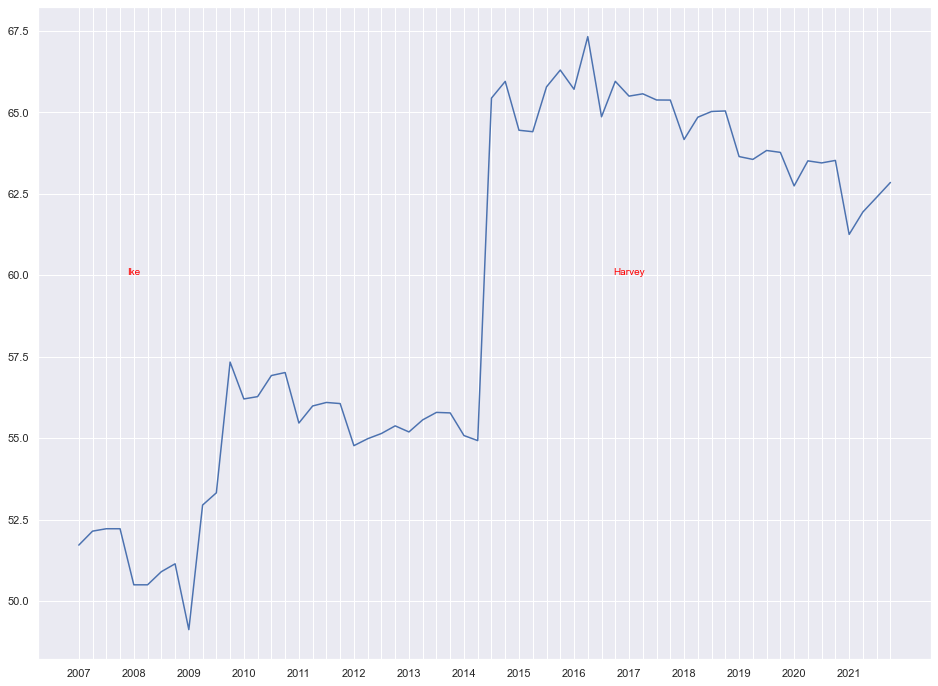

In [89]:
#display(grptx)
inst = grptx.loc[(slice(None),slice(None),slice(None), 'INST.'), :]
#q2_inst = grptx.loc[(slice(None),slice(None),'2', 'INST.'), :]
#q3_inst = grptx.loc[(slice(None),slice(None),'3', 'INST.'), :]
#q4_inst = grptx.loc[(slice(None),slice(None),'4', 'INST.'), :]
#display(inst.index.get_level_values(['Year','Quarter']))
#display(inst['GDP_Index'])
#display(inst)
#? inst.index.get_level_values
inst.reset_index(inplace=True)
#display(inst.Year + '-Q' + inst.Quarter)
fig = plt.figure(figsize=(16,12))
plt.plot((inst.Year + '-Q' + inst.Quarter).replace(to_replace='-Q1',value='',regex=True),inst.GDP_Index)

ax = plt.gca()
style = dict(size=10, color='red')
#ax.text('2008-Q1',60,'Ike',ha='center',**style)
#ax.text('2017-Q1',60,'Harvey',ha='center',**style)
ax.text('2008',60,'Ike',ha='center',**style)
ax.text('2017',60,'Harvey',ha='center',**style)
#ax.legend(lines,['Q1','Q2','Q3','Q4'],loc='upper left',frameon=False)
i=0
#for label in ax.axes.xaxis.get_ticklabels()[::]:
for label in ax.axes.xaxis.get_ticklabels():
    if i%4 != 0:
        label.set_visible(False)
    #else:
    #    label.set_text('yo')
    i += 1

#labels = [item.get_text() for item in ax.axes.xaxis.get_ticklabels()]
#labels
#labels[1] = 'hello'
#ax.set_xticklabels(labels)

    
#display(inst)

In [90]:
#display(dfaon2.filter(items=['Texas']))
dfaon2[np.in1d(dfaon2.index.get_level_values(0), ['Texas']) \
       & np.in1d(dfaon2.index.get_level_values(4), ['Tropical Cyclone'])]

Start Date  \
State Year Quarter Event                 Category                      
Texas 2005 3       Hurricane Rita        Tropical Cyclone  9/20/2005   
      2007 3       Hurricane Humberto    Tropical Cyclone  9/13/2007   
                   Tropical Storm Erin   Tropical Cyclone  8/15/2007   
      2008 3       TS Edouard            Tropical Cyclone   8/5/2008   
                   hu Dolly              Tropical Cyclone  7/23/2008   
                   hu Ike                Tropical Cyclone  9/12/2008   
      2011 1       TS Don                Tropical Cyclone  7/29/2011   
      2012 2       TS Beryl              Tropical Cyclone  5/25/2012   
      2015 2       TS Bill               Tropical Cyclone  6/16/2015   
      2017 3       Hurricane Harvey      Tropical Cyclone  8/25/2017   
      2019 3       Tropical Storm Imelda Tropical Cyclone  9/17/2019   
      2020 3       Hurricane Hanna       Tropical Cyclone  7/25/2020   
                   Hurricane Laura       Tropical Cyclone  8/21/2020   
                   Tropical Storm Beta   Tropical Cyclone  9/20/2020   
           4       Hurricane Delta       Tropical Cyclone  10/7/2020   
      2021 1       Hurricane Nicholas    Tropical Cyclone      44451   
                   Tropical Storm Fred   Tropical Cyclone      44418   

                                                             End Date  \
State Year Quarter Event                 Category                       
Texas 2005 3       Hurricane Rita        Tropical Cyclone   9/24/2005   
      2007 3       Hurricane Humberto    Tropical Cyclone   9/13/2007   
                   Tropical Storm Erin   Tropical Cyclone   8/22/2007   
      2008 3       TS Edouard            Tropical Cyclone    8/6/2008   
                   hu Dolly              Tropical Cyclone   7/26/2008   
                   hu Ike                Tropical Cyclone   9/15/2008   
      2011 1       TS Don                Tropical Cyclone      //2011   
      2012 2       TS Beryl              Tropical Cyclone   5/30/2012   
      2015 2       TS Bill               Tropical Cyclone   6/18/2015   
      2017 3       Hurricane Harvey      Tropical Cyclone    9/2/2017   
      2019 3       Tropical Storm Imelda Tropical Cyclone   9/20/2019   
      2020 3       Hurricane Hanna       Tropical Cyclone   7/27/2020   
                   Hurricane Laura       Tropical Cyclone   8/29/2020   
                   Tropical Storm Beta   Tropical Cyclone   9/23/2020   
           4       Hurricane Delta       Tropical Cyclone  10/11/2020   
      2021 1       Hurricane Nicholas    Tropical Cyclone       44456   
                   Tropical Storm Fred   Tropical Cyclone       44425   

                                                           Insured Damages $2022  \
State Year Quarter Event                 Category                                  
Texas 2005 3       Hurricane Rita        Tropical Cyclone           14346.564000   
      2007 3       Hurricane Humberto    Tropical Cyclone              41.844145   
                   Tropical Storm Erin   Tropical Cyclone              44.235239   
      2008 3       TS Edouard            Tropical Cyclone               0.000000   
                   hu Dolly              Tropical Cyclone             753.194610   
                   hu Ike                Tropical Cyclone           25226.041700   
      2011 1       TS Don                Tropical Cyclone               0.000000   
      2012 2       TS Beryl              Tropical Cyclone            2151.984600   
      2015 2       TS Bill               Tropical Cyclone              74.123914   
      2017 3       Hurricane Harvey      Tropical Cyclone           35866.000000   
      2019 3       Tropical Storm Imelda Tropical Cyclone            1233.577437   
      2020 3       Hurricane Hanna       Tropical Cyclone             525.073228   
                   Hurricane Laura       Tropical Cyclone               2.024422   
                   Tropical Storm Beta   

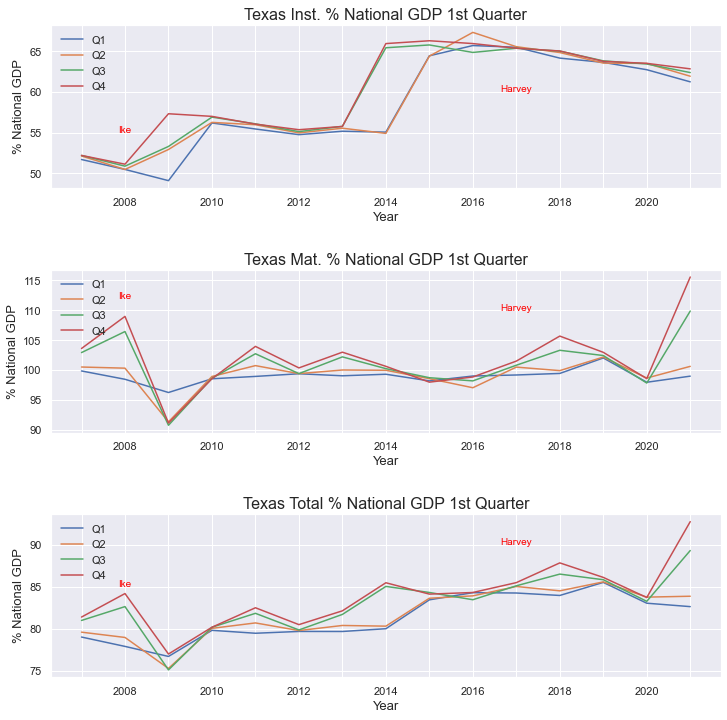

In [91]:
fig = plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.5,
                    hspace=0.5)
#plt.subplots_adjust(left=0.1,
#                    bottom=0.1,
#                    right=0.9,
#                    top=0.9,
#                    wspace=0.4,
#                    hspace=0.4)
#display(grptx)
#display(grptx.loc[('Type')])
#display(grptx.loc[(slice(None),slice(None),'1', 'INST.'), :])
#grptx.loc[(slice(None),slice(None),'1', 'INST.'), :].plot()
q1_inst = grptx.loc[(slice(None),slice(None),'1', 'INST.'), :]
q2_inst = grptx.loc[(slice(None),slice(None),'2', 'INST.'), :]
q3_inst = grptx.loc[(slice(None),slice(None),'3', 'INST.'), :]
q4_inst = grptx.loc[(slice(None),slice(None),'4', 'INST.'), :]
q1_mat = grptx.loc[(slice(None),slice(None),'1', 'MAT.'), :]
q2_mat = grptx.loc[(slice(None),slice(None),'2', 'MAT.'), :]
q3_mat = grptx.loc[(slice(None),slice(None),'3', 'MAT.'), :]
q4_mat = grptx.loc[(slice(None),slice(None),'4', 'MAT.'), :]
q1_tot = grptx.loc[(slice(None),slice(None),'1', 'TOTAL'), :]
q2_tot = grptx.loc[(slice(None),slice(None),'2', 'TOTAL'), :]
q3_tot = grptx.loc[(slice(None),slice(None),'3', 'TOTAL'), :]
q4_tot = grptx.loc[(slice(None),slice(None),'4', 'TOTAL'), :]
#display(tmp.index.get_level_values('Year'))

titlefontsize = 16.0
xlabelfontsize = 13.0
ylabelfontsize = 13.0

plt.subplot(3,1,1)
lines = []
lines += plt.plot(q1_inst.index.get_level_values('Year'),q1_inst['GDP_Index'])
lines += plt.plot(q2_inst.index.get_level_values('Year'),q2_inst['GDP_Index'])
lines += plt.plot(q3_inst.index.get_level_values('Year'),q3_inst['GDP_Index'])
lines += plt.plot(q4_inst.index.get_level_values('Year'),q4_inst['GDP_Index'])
plt.xlabel("Year",fontdict={'fontsize': xlabelfontsize})
plt.ylabel("% National GDP",fontdict={'fontsize': ylabelfontsize})
plt.title("Texas Inst. % National GDP 1st Quarter",fontdict={'fontsize': titlefontsize})
ax = plt.gca()
style = dict(size=10, color='red')
ax.text('2008',55,'Ike',ha='center',**style)
ax.text('2017',60,'Harvey',ha='center',**style)
ax.legend(lines,['Q1','Q2','Q3','Q4'],loc='upper left',frameon=False)
for label in ax.axes.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
plt.subplot(3,1,2)
lines = []
lines += plt.plot(q1_mat.index.get_level_values('Year'),q1_mat['GDP_Index'])
lines += plt.plot(q2_mat.index.get_level_values('Year'),q2_mat['GDP_Index'])
lines += plt.plot(q3_mat.index.get_level_values('Year'),q3_mat['GDP_Index'])
lines += plt.plot(q4_mat.index.get_level_values('Year'),q4_mat['GDP_Index'])
plt.xlabel("Year",fontdict={'fontsize': xlabelfontsize})
plt.ylabel("% National GDP",fontdict={'fontsize': ylabelfontsize})
plt.title("Texas Mat. % National GDP 1st Quarter",fontdict={'fontsize': titlefontsize})
ax = plt.gca()
style = dict(size=10, color='red')
ax.text('2008',112,'Ike',ha='center',**style)
ax.text('2017',110,'Harvey',ha='center',**style)
ax.legend(lines,['Q1','Q2','Q3','Q4'],loc='upper left',frameon=False)
for label in ax.axes.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
plt.subplot(3,1,3)
lines = []
lines += plt.plot(q1_tot.index.get_level_values('Year'),q1_tot['GDP_Index'])
lines += plt.plot(q2_tot.index.get_level_values('Year'),q2_tot['GDP_Index'])
lines += plt.plot(q3_tot.index.get_level_values('Year'),q3_tot['GDP_Index'])
lines += plt.plot(q4_tot.index.get_level_values('Year'),q4_tot['GDP_Index'])
plt.xlabel("Year",fontdict={'fontsize': xlabelfontsize})
plt.ylabel("% National GDP",fontdict={'fontsize': ylabelfontsize})
plt.title("Texas Total % National GDP 1st Quarter",fontdict={'fontsize': titlefontsize})
ax = plt.gca()
style = dict(size=10, color='red')
ax.text('2008',85,'Ike',ha='center',**style)
ax.text('2017',90,'Harvey',ha='center',**style)
ax.legend(lines,['Q1','Q2','Q3','Q4'],loc='upper left',frameon=False)
for label in ax.axes.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
   
#plt.axes.xaxis.set_ticklabels([])
#plt.xlabel("Year")
#plt.ylabel("% National GDP")
#plt.title("1Q % GDP Changes")
#ax = plt.gca()

#ax.legend(lines,['Q1 Inst.','Q2 Inst.','Q3 Inst.','Q4 Inst.', 
#                'Q1 Mat.','Q1 Mat.','Q1 Mat.','Q1 Mat.',
#                'Q1 Total','Q2 Total','Q3 Total','Q4 Total'],loc='upper right',frameon=False)

#ax.axes.xaxis.set_ticklabels([])
#print(type(txplt))
#help(plt.plot)
#for label in ax.axes.xaxis.get_ticklabels()[::2]:
#    label.set_visible(False)

In [92]:
#plt.subplot(3,1,1).savefig('texas_hurricanes1.jpg')
#plt.savefig('texas_hurricanes.png')
#plt.savefig('texas_hurricanes1.jpg', bbox_inches='tight')
fig.savefig('texas_hurricanes.jpg')

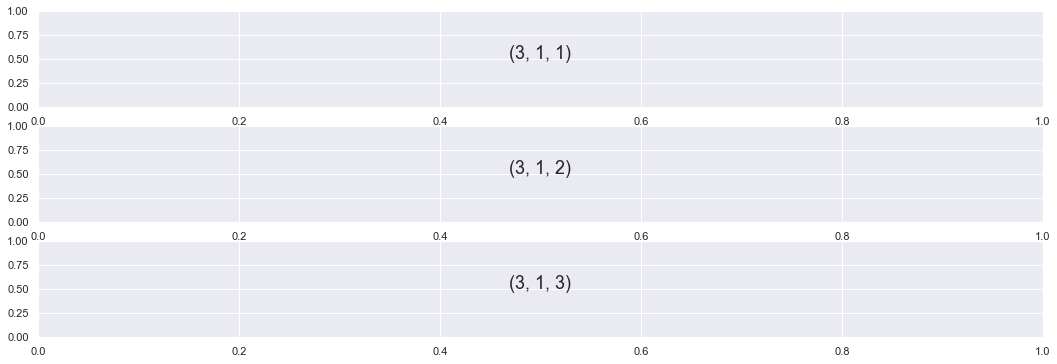

In [93]:
fig = plt.figure(figsize=(18,6))
for i in range(1,4):
    plt.subplot(3,1,i)
    plt.text(0.5,0.5,str((3,1,i)),fontsize=18,ha='center')

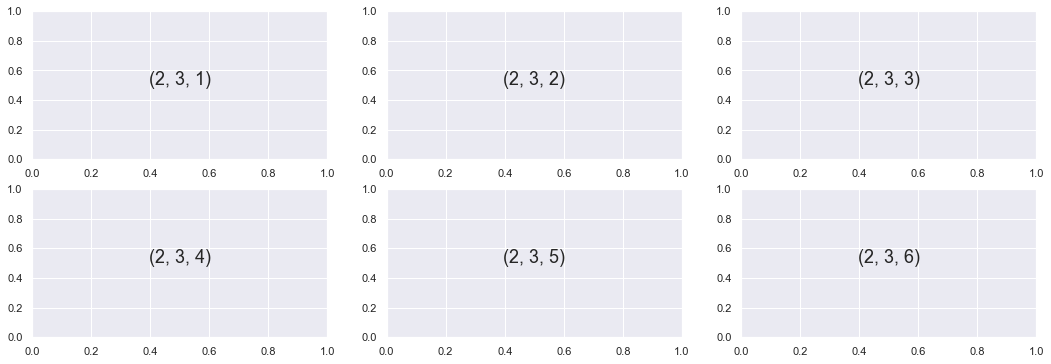

In [94]:
fig = plt.figure(figsize=(18,6))
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),fontsize=18,ha='center')

In [95]:
fig = plt.figure(figsize=(6,6))

<Figure size 432x432 with 0 Axes>

## Process Nationwide GDP

In [96]:
# constr_spend_file = "nationwide_constr_spend.xlsx"

In [97]:
# display(dfgdp)

In [98]:
dfconstrspnd = pd.DataFrame(pd.read_excel(os.path.join(base_dir,"..",gdp_in_file),header=7))

In [99]:
display(dfconstrspnd)

,Period,Value,Unnamed: 2
0,Jan-2002,858654.0,NaN
1,Feb-2002,862338.0,NaN
2,Mar-2002,844551.0,NaN
3,Apr-2002,858240.0,NaN
4,May-2002,850935.0,NaN
...,...,...,...
247,Aug-2022,NaN,NaN
248,Sep-2022,NaN,NaN
249,Oct-2022,NaN,NaN
250,Nov-2022,NaN,NaN


In [100]:
dfconstrspnd = dfconstrspnd.drop(columns=['Unnamed: 2'])

In [101]:
cnstridx = pd.DatetimeIndex(pd.to_datetime(dfconstrspnd['Period']))
cmnth = cnstridx.month.to_series(index=np.arange(len(cnstridx)))
cyr = cnstridx.year.to_series(index=np.arange(len(cnstridx)))
cmnth[cmnth <= 3]=1
cmnth.loc[(cmnth > 3) & (mnth <= 6)]=2
cmnth.loc[(cmnth > 6) & (mnth <= 9)]=3
cmnth.loc[cmnth > 9]=4
dfconstrspnd['Quarter'] = cyr.apply(str) + "-Q" + cmnth.apply(str)
dfconstrspnd = dfconstrspnd.drop(columns=['Period'])
display(dfconstrspnd)

,Value,Quarter
0,858654.0,2002-Q1
1,862338.0,2002-Q1
2,844551.0,2002-Q1
3,858240.0,2002-Q2
4,850935.0,2002-Q2
...,...,...
247,NaN,2022-Q2
248,NaN,2022-Q2
249,NaN,2022-Q2
250,NaN,2022-Q2


In [102]:
dfconstrspnd = dfconstrspnd.dropna()
display(dfconstrspnd)

,Value,Quarter
0,858654.0,2002-Q1
1,862338.0,2002-Q1
2,844551.0,2002-Q1
3,858240.0,2002-Q2
4,850935.0,2002-Q2
...,...,...
237,1626413.0,2021-Q2
238,1643024.0,2021-Q2
239,1668718.0,2021-Q2
240,1695531.0,2022-Q1


In [103]:
grpcons = dfconstrspnd.groupby(['Quarter'],axis=0,as_index=False) # as_index flattens the group by more like sql
grpcons = grpcons.sum()
display(grpcons)

,Quarter,Value
0,2002-Q1,2565543.0
1,2002-Q2,7614531.0
2,2003-Q1,2574212.0
3,2003-Q2,8112038.0
4,2004-Q1,2837497.0
5,2004-Q2,9033143.0
6,2005-Q1,3184675.0
7,2005-Q2,10194549.0
8,2006-Q1,3606450.0
9,2006-Q2,10365660.0


In [104]:
grpcons['Value'] /= 4

In [105]:
display(grpcons)

,Quarter,Value
0,2002-Q1,641385.75
1,2002-Q2,1903632.75
2,2003-Q1,643553.00
3,2003-Q2,2028009.50
4,2004-Q1,709374.25
5,2004-Q2,2258285.75
6,2005-Q1,796168.75
7,2005-Q2,2548637.25
8,2006-Q1,901612.50
9,2006-Q2,2591415.00


In [106]:
if create_output_files:
    grpcons.to_csv(os.path.join(out_dir,gdp_out_file))

In [107]:
datetime.datetime.strptime("Jan-2002","%b-%Y")

datetime.datetime(2002, 1, 1, 0, 0)

In [108]:
# load construction spending data from US cenus ("nationwide_constr_spend.xlsx")
# manipulate so that data is by quarter rather than by month, by summing
# use the consolidated construction data from BEA (in first section, above) to do a weighted avg for const. spend
#   each states weight is calculated for each quarter by const spend/tot const spend for all states
#   multiply that number in each state by the us census number
#   add those results to get the weighted average (i think that is right, but need to double check)

## Process FEMA

In [355]:
# US GDP Construction
fema_in_file = "HELP HELP.xlsx"
#fema_in_file = "HELP HELP2.xlsx"
fema_fed_out_file = "fema_fed_by_month.csv"
fema_st_out_file = "fema_state_by_month.csv"
fema_tot_out_file = "fema_total_by_month.csv"
# fp = os.path.join(base_dir,str.format(bea_file_fmt,k))
# df = pd.read_csv(fp)
# df = df[df.Description.notnull()]
# df = df[df.Description.str.match('\s*[Cc]onstruction\s*')]
#np.arange(12)
#dffema = pd.DataFrame(pd.read_excel(os.path.join(base_dir,fema_in_file),header=1,sheet_name='HELP',
#                                    index_col=np.arange(12).tolist(),nrows=10))
dffema = pd.DataFrame(pd.read_excel(os.path.join(base_dir,fema_in_file),header=1,sheet_name='HELP',
                                    usecols=np.arange(12).tolist()))
#dffema = pd.DataFrame(pd.read_excel(os.path.join(base_dir,fema_in_file),header=1,sheet_name='HELP',
#                                    usecols=np.arange(12).tolist(),nrows=10))
#print(np.arange(12).tolist())
#[0,1,2,3,4,5,6,7,8,9,10,11]
#dffema = pd.DataFrame(pd.read_excel(os.path.join(base_dir,fema_in_file),header=1,sheet_name='HELP',nrows=10))
#dffema.head()
#np.arange(12)

In [376]:
#print(dffema["FED SPEND"])
#dffema["FED SPEND"] = dffema["FED SPEND"].str.strip()
#print(dffema["FED SPEND"])
#dffema["FED SPEND"] = dffema["FED SPEND"].replace('$','')
#print(dffema["FED SPEND"])
#dffema["FED SPEND"] = dffema["FED SPEND"].str.replace('$','')
#dffema["STATE SPEND"] = dffema["STATE SPEND"].str.replace('$','')
#dffema["TOTAL PROJECT SPEND"] = dffema["TOTAL PROJECT SPEND"].str.replace('$','')
#display(dffema)
dffema["FED SPEND"] = pd.to_numeric(dffema["FED SPEND"], errors='coerce').fillna(0).astype('float').round(2)
dffema["STATE SPEND"] = pd.to_numeric(dffema["STATE SPEND"], errors='coerce').fillna(0).astype('float').round(2)
dffema["START YR"] = pd.to_numeric(dffema["START YR"], errors='coerce').fillna(0).astype('int')
dffema["START MO"] = pd.to_numeric(dffema["START MO"], errors='coerce').fillna(0).astype('int')
dffema["END YR"] = pd.to_numeric(dffema["END YR"], errors='coerce').fillna(0).astype('int')
dffema["END MO"] = pd.to_numeric(dffema["END MO"], errors='coerce').fillna(0).astype('int')
#dffema[dffema["END MO"]<1 & dffema["END MO"]>12]["END MO"] = dffema[dffema["END MO"]<1 & dffema["END MO"]>12]["START MO"]
#dffema[dffema["END YR"]<1 & dffema["END MO"]>12]["END MO"] = dffema[dffema["END MO"]<1 & dffema["END MO"]>12]["START YR"]
baddates = ((dffema["END MO"]<1) | (dffema["END MO"]>12))
#display(dffema[(dffema["END MO"]<1) | (dffema["END MO"]>12)])
#display(dffema[baddates])
dffema.loc[baddates,"END YR"] = dffema[baddates]["START YR"]
dffema.loc[baddates,"END MO"] = dffema[baddates]["START MO"]
#print(dffema["FED SPEND"])
#dffema["FED SPEND"] = dffema["FED SPEND"].replace('-','')
#dffema["FED SPEND"] = dffema["FED SPEND"].fillna(0).astype(float).round(2)

In [377]:
#help(pd.read_excel)
display(dffema)

,FUND SOURCE,TYPE,COUNTY,STATE,START YR,START MO,END YR,END MO,NUMBER OF MONTHS,TOTAL PROJECT SPEND,FED SPEND,STATE SPEND
0,PUBLIC ASSISTANCE,Coastal Storm,Statewide,CO,2005,9,2005,9,1.0,1039431.28,1039431.28,0.00
1,PUBLIC ASSISTANCE,Fire,Rosebud,MT,2012,8,2012,8,1.0,2664.51,1998.38,666.13
2,PUBLIC ASSISTANCE,Fire,Statewide,MT,2012,8,2012,8,1.0,22914.27,17185.70,5728.57
3,PUBLIC ASSISTANCE,Tornado,Lincoln,OK,1999,5,1999,5,1.0,0.00,0.00,0.00
4,PUBLIC ASSISTANCE,Tornado,Creek,OK,1999,5,1999,5,1.0,70000.00,70000.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
950542,HOUSING ASSISTANCE RENTERS,NaN,53216,WI,2010,8,2010,8,NaN,0.00,3361725.14,0.00
950543,HOUSING ASSISTANCE RENTERS,NaN,53218,WI,2010,8,2010,8,NaN,0.00,3753216.85,0.00
950544,HOUSING ASSISTANCE RENTERS,NaN,53209,WI,2010,8,2010,8,NaN,0.00,4084102.26,0.00
950545,HOUSING ASSISTANCE RENTERS,NaN,53206,WI,2010,8,2010,8,NaN,0.00,4770400.99,0.00


In [111]:
#import numpy as np
#import matplotlib.pyplot as plt
from scipy.stats import rvs_ratio_uniforms
from sympy import *
import sympy
import scipy.stats as stats
#from scipy.stats import truncnorm

In [112]:
seed = 47563
rng = np.random.default_rng(seed)
days = 90
spend = 500000
mu = days/2
sigma = days/6

a, b = (0 - mu) / sigma, ((days-1) - mu) / sigma

#X = stats.truncnorm(0, days-1, loc=mu, scale=sigma)
#stats.truncnorm(0, days-1, loc=mu, scale=sigma)
vals = stats.truncnorm.rvs(a,b,loc=mu,scale=sigma,size=spend,random_state=rng).round().astype(int)

#print(rng.random())
#vals = np.clip(rng.normal(mu,sigma,spend).round().astype(int),0,days-1)
#vals = np.clip(rng.normal(days/2,days/6,spend).round().astype(int),0,days-1)
#vals = np.clip(np.random.gamma(40,.5,spend).round().astype(int),0,days-1)
print(np.bincount(vals))
np.bincount(vals).sum()
#$print(vals.sum())

[   98   158   229   257   325   395   472   523   684   762   899  1016
  1156  1350  1537  1761  2059  2350  2533  2937  3340  3758  4211  4600
  5083  5473  6017  6547  6963  7566  8102  8583  9237  9625 10242 10802
 11343 11541 11821 12192 12870 12835 13153 13141 13275 13242 13178 13220
 13043 12854 12450 12147 12250 11649 11027 10550 10328  9559  9091  8663
  7945  7738  7041  6532  5989  5511  5083  4573  4028  3744  3280  2945
  2566  2305  2093  1776  1582  1378  1166  1006   918   737   703   536
   422   408   314   281   225   103]


500000

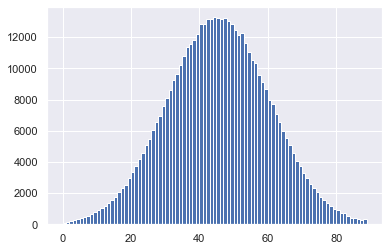

In [113]:
_ = plt.hist(vals,bins=np.arange(days))

In [114]:
from pandas.tseries.offsets import MonthEnd

month1, year1 = 2, 2011
month2, year2 = 3, 2015
#print(pd.to_datetime(f"{month1} {year1}") + MonthEnd(0))
print(pd.to_datetime(f"{month2} {year2}") + MonthEnd(0))
dt2 = pd.to_datetime(f"{month2} {year2}") + MonthEnd(0)
#f"{year}-{month}-1"
#print(pd.Period(f"{month1} {year1}").daysinmonth)
#print(pd.Period(f"{year1}-{month1}-1").daysinmonth)
#print(pd.date_range(start='2019-11-22', periods=10, freq='D').to_period('M').value_counts())
print(len(pd.date_range(start=f"{month1} {year1}", end=dt2, freq='D')))

2015-03-31 00:00:00
1520


In [115]:
# step 1: add column for # of days in the specified months
# step 2: add columns for mu and sigma
# step 3: add columns for a and b
# step 4: add column for normal/gamma/other distribution over # of days (list with len == # days)
# step 5: add column for number of days for each month in range (list with len == # months)
# step 6: add column for month/year values (adds dist. vals from step 4 for # days/month in step 5)
#         (list of total month/year costs with len == # months)
# step 7: add column for offset to align start month/year with month/year column
# step 8: update the values in columns starting at the offset calcuated in step 7 with the 
#         values created in step 6 (not sure how to do this, but maybe "apply" method?)
# step 9: drop the columns added in steps 1-7
# step 10: create column that totals the month/year columns
# step 11: write any lines (ideally, including line number) to an error file

In [298]:
#dffemacopy = dffema.copy()

In [299]:
dffema = dffemacopy.copy()

In [300]:
#display(dffema)
#len(dffema.columns)
#help(dffema.reindex)
use_gaussian = False

In [119]:
dt1 = pd.to_datetime("2 2018")
dt2 = pd.to_datetime("5 2019") + MonthEnd(0)
days = len(pd.date_range(start=dt1, end=dt2, freq='D'))
print(days)
print(sum(pd.date_range(start=dt1, end=dt2, freq='M').daysinmonth))
#pd.date_range(start=dt1, end=dt2, freq='D')
a = np.arange(days)
pd.date_range(start=dt1, end=dt2, freq='M').daysinmonth

dr = pd.date_range(start=dt1, end=dt2, freq='D')
mr = pd.date_range(start=dt1, end=dt2, freq='M')

df = pd.DataFrame({"val":a},index=dr)
#df.index.name = "day"
display(df.index)
df = df.groupby(df.index.strftime('%Y-%m')).sum().reset_index()
#df.groupby(index.dt.strftime('%Y-%m')).sum().reset_index()
df.val.tolist()
#df.index

485
485


DatetimeIndex(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
               '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-10',
               ...
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31'],
              dtype='datetime64[ns]', length=485, freq='D')

[378,
 1333,
 2205,
 3224,
 4035,
 5115,
 6076,
 6795,
 7967,
 8625,
 9858,
 10819,
 10598,
 12648,
 13155,
 14539]

In [343]:
def split_spending(row,col_name):
    dt1 = pd.to_datetime(str(row["START MO"]) + " " + str(row["START YR"]))
    dt2 = max(pd.to_datetime(str(row["START MO"]) + 
                                           " " + str(row["START YR"])),
                            pd.to_datetime(str(row["END MO"]) + 
                                           " " + str(row["END YR"]))) + MonthEnd(0)
    #print(row.index.tolist())
    if(dt1 != dt2):
        dtr = pd.date_range(start=dt1, end=dt2, freq='M').strftime("%Y-%m")
        if use_gaussian:
            #spend = int(row["FED SPEND"]*100)
            spend = int(row[col_name]*100)
            days = len(pd.date_range(start=dt1, end=dt2, freq='D'))
            #print(days)
            mu = days/2
            sigma = days/6
            a, b = (0 - mu) / sigma, ((days-1) - mu) / sigma
            seed = 47563
            rng = np.random.default_rng(seed)
            vals = stats.truncnorm.rvs(a,b,loc=mu,scale=sigma,size=spend,random_state=rng).round().astype(int)
            vals = np.bincount(vals)
            #print(len(vals))
            #print(len(dtr.tolist()))
            df = pd.DataFrame({"val":vals},index=pd.date_range(start=dt1, end=dt2, freq='D'))
            #print(len(df.groupby(df.index.strftime('%Y-%m')).sum().reset_index().val.tolist()))
            #row[dtr.tolist()] = ((df.groupby(df.index.strftime('%Y-%m')).sum().reset_index().val)/100).tolist()
            row[dtr.tolist()] = df.groupby(df.index.strftime('%Y-%m')).sum().reset_index().val.tolist()
            #print('......................')
        else:
            #print(dtr.tolist())
            dtrlst = dtr.tolist()
            row[dtrlst] = round(row[col_name]/len(dtrlst),2)
            tmp = round(row[dtr.tolist()].sum(),2)
            if tmp > row[col_name]:
                tmp = round(tmp-row[col_name],2)
                # reduce tails
                row[dtrlst[0]] -= round(tmp/2,2)
                if tmp > .01:
                    row[dtrlst[-1]] -= round(tmp/2 + (0. if (int(tmp)*100)%2 == 0 else .01),2)
            elif tmp < row[col_name]:
                # pad center
                row[dtrlst[int(len(dtrlst)/2)]] += round(row[col_name]-tmp,2)
    else:
        row[dt1.strftime("%Y-%m")] = row[col_name]
    #print(".....................")
    return row

In [344]:
def split_fed_spending(row):
    return split_spending(row,"FED SPEND")
#     dt1 = pd.to_datetime(str(row["START MO"]) + " " + str(row["START YR"]))
#     dt2 = max(pd.to_datetime(str(row["START MO"]) + 
#                                            " " + str(row["START YR"])),
#                             pd.to_datetime(str(row["END MO"]) + 
#                                            " " + str(row["END YR"]))) + MonthEnd(0)
#     #print(row.index.tolist())
#     if(dt1 != dt2):
#         dtr = pd.date_range(start=dt1, end=dt2, freq='M').strftime("%Y-%m")
#         if use_gaussian:
#             #spend = int(row["FED SPEND"]*100)
#             spend = int(row["FED SPEND"]*100)
#             days = len(pd.date_range(start=dt1, end=dt2, freq='D'))
#             #print(days)
#             mu = days/2
#             sigma = days/6
#             a, b = (0 - mu) / sigma, ((days-1) - mu) / sigma
#             seed = 47563
#             rng = np.random.default_rng(seed)
#             vals = stats.truncnorm.rvs(a,b,loc=mu,scale=sigma,size=spend,random_state=rng).round().astype(int)
#             vals = np.bincount(vals)
#             #print(len(vals))
#             #print(len(dtr.tolist()))
#             df = pd.DataFrame({"val":vals},index=pd.date_range(start=dt1, end=dt2, freq='D'))
#             #print(len(df.groupby(df.index.strftime('%Y-%m')).sum().reset_index().val.tolist()))
#             #row[dtr.tolist()] = ((df.groupby(df.index.strftime('%Y-%m')).sum().reset_index().val)/100).tolist()
#             row[dtr.tolist()] = df.groupby(df.index.strftime('%Y-%m')).sum().reset_index().val.tolist()
#             #print('......................')
#         else:
#             #print(dtr.tolist())
#             dtrlst = dtr.tolist()
#             row[dtrlst] = round(row["FED SPEND"]/len(dtrlst),2)
#             tmp = round(row[dtr.tolist()].sum(),2)
#             if tmp > row["FED SPEND"]:
#                 print(F'reduce tail for {tmp}')
#                 tmp = round(tmp-row["FED SPEND"],2)
#                 # reduce tails
#                 row[dtrlst[0]] -= round(tmp/2,2)
#                 if tmp > .01:
#                     row[dtrlst[-1]] -= round(tmp/2 + (0. if (int(tmp)*100)%2 == 0 else .01),2)
#             elif tmp < row["FED SPEND"]:
#                 # pad center
#                 row[dtrlst[int(len(dtrlst)/2)]] += round(row["FED SPEND"]-tmp,2)
#     else:
#         row[dt1.strftime("%Y-%m")] = row["FED SPEND"]
#     #print(".....................")
#     return row

In [345]:
def split_state_spending(row):
    return split_spending(row,"STATE SPEND")

In [346]:
def split_tot_spending(row):
    return split_spending(row,"TOTAL PROJECT SPEND")

In [380]:
# I think the best way to handle this is to create a start date and end date column, coercing errors
# drop all rows with invalid dates? Not sure.

dffema = dffema[(dffema["START MO"]<=12) & (dffema["START MO"]>=1)]
display(dffema[(dffema["START MO"]>12) | (dffema["START MO"]<1)])

,FUND SOURCE,TYPE,COUNTY,STATE,START YR,START MO,END YR,END MO,NUMBER OF MONTHS,TOTAL PROJECT SPEND,FED SPEND,STATE SPEND


In [381]:
#dffema = dffemacopy.copy()
# add columns for all dates covered
#date_col_offset = len(dffema.columns)

#dti = pd.date_range(
#    start = pd.to_datetime(dffema["START MO"].astype(str) + " " + dffema["START YR"].astype(str)).min(),
#    end = max(pd.to_datetime(dffema["START MO"].astype(str) + " " + dffema["START YR"].astype(str)).max(),
#               pd.to_datetime(dffema["END MO"].astype(str) + " " + dffema["END YR"].astype(str)).max()),
#    freq='M').strftime("%Y-%m")

firstdate = pd.to_datetime(dffema["START MO"].astype(str) + " " + dffema["START YR"].astype(str)).min()
#lastdate = max(pd.to_datetime(dffema["START MO"].astype(str) + " " + dffema["START YR"].astype(str)).max(),
#               pd.to_datetime(dffema["END MO"].astype(str) + " " + dffema["END YR"].astype(str)).max())
#display(firstdate)
#display(lastdate)
#dti = pd.date_range(start=firstdate,end=lastdate,freq='M')
#dti = dti.strftime("%Y-%m")
print(firstdate)
print(pd.to_datetime(dffema["START MO"].astype(str) + 
                                           " " + dffema["START YR"].astype(str)).max()+MonthEnd(0))
print(pd.to_datetime(dffema["END MO"].astype(str) + 
                                           " " + dffema["END YR"].astype(str)).max()+MonthEnd(0))
print(max(pd.to_datetime(dffema["START MO"].astype(str) + 
                                           " " + dffema["START YR"].astype(str)).max()+MonthEnd(0),
                            pd.to_datetime(dffema["END MO"].astype(str) + 
                                           " " + dffema["END YR"].astype(str)).max()+MonthEnd(0)))
dti = pd.date_range(start=firstdate,
                    end=max(pd.to_datetime(dffema["START MO"].astype(str) + 
                                           " " + dffema["START YR"].astype(str),format="%m %Y").max()+MonthEnd(0),
                            pd.to_datetime(dffema["END MO"].astype(str) + 
                                           " " + dffema["END YR"].astype(str),format="%m %Y").max()+MonthEnd(0)),
                    freq='M').strftime("%Y-%m")

display(dti)
#display(dti[5])
#display(df.columns.tolist() + dti.tolist())
dffema = dffema.reindex(dffema.columns.tolist()+dti.tolist(),fill_value=0,axis=1)
dffema[dti.tolist()] = dffema[dti.tolist()].astype(float)

1991-02-01 00:00:00
2023-09-30 00:00:00


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 3016-09-01 00:00:00

In [348]:
display(dffema)

,FUND SOURCE,TYPE,COUNTY,STATE,START YR,START MO,END YR,END MO,NUMBER OF MONTHS,TOTAL PROJECT SPEND,...,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03
0,PUBLIC ASSISTANCE,Coastal Storm,Statewide,CO,2005,9,2005,9,1,1039431.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PUBLIC ASSISTANCE,Fire,Rosebud,MT,2012,8,2012,8,1,2664.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PUBLIC ASSISTANCE,Fire,Statewide,MT,2012,8,2012,8,1,22914.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PUBLIC ASSISTANCE,Tornado,Lincoln,OK,1999,5,1999,5,1,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PUBLIC ASSISTANCE,Tornado,Creek,OK,1999,5,1999,5,1,70000.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,PUBLIC ASSISTANCE,Tornado,Logan,OK,1999,5,1999,5,1,187500.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,PUBLIC ASSISTANCE,Tornado,Oklahoma,OK,1999,5,1999,5,1,250000.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,PUBLIC ASSISTANCE,Tornado,Statewide,OK,1999,5,1999,5,1,500000.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,PUBLIC ASSISTANCE,Tornado,McClain,OK,1999,5,1999,5,1,562500.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,PUBLIC ASSISTANCE,Tornado,Grady,OK,1999,5,1999,5,1,1000000.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [349]:
dffemafed = dffema.apply(split_fed_spending,axis=1)
dffemastate = dffema.apply(split_state_spending,axis=1)
dffematotal = dffema.apply(split_tot_spending,axis=1)
#dffema.apply(np.sqrt,axis=1)
#dffema = dffema.apply(split_spending,axis=1)
#dffema["2012-05"]
display(dffemafed)
display(dffemastate)
display(dffematotal)
#display(dffema["FED SPEND"])

,FUND SOURCE,TYPE,COUNTY,STATE,START YR,START MO,END YR,END MO,NUMBER OF MONTHS,TOTAL PROJECT SPEND,...,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03
0,PUBLIC ASSISTANCE,Coastal Storm,Statewide,CO,2005,9,2005,9,1,1039431.28,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,PUBLIC ASSISTANCE,Fire,Rosebud,MT,2012,8,2012,8,1,2664.51,...,0.0,0.0,1998.38,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,PUBLIC ASSISTANCE,Fire,Statewide,MT,2012,8,2012,8,1,22914.27,...,0.0,0.0,17185.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,PUBLIC ASSISTANCE,Tornado,Lincoln,OK,1999,5,1999,5,1,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,PUBLIC ASSISTANCE,Tornado,Creek,OK,1999,5,1999,5,1,70000.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
5,PUBLIC ASSISTANCE,Tornado,Logan,OK,1999,5,1999,5,1,187500.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
6,PUBLIC ASSISTANCE,Tornado,Oklahoma,OK,1999,5,1999,5,1,250000.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
7,PUBLIC ASSISTANCE,Tornado,Statewide,OK,1999,5,1999,5,1,500000.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
8,PUBLIC ASSISTANCE,Tornado,McClain,OK,1999,5,1999,5,1,562500.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
9,PUBLIC ASSISTANCE,Tornado,Grady,OK,1999,5,1999,5,1,1000000.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


,FUND SOURCE,TYPE,COUNTY,STATE,START YR,START MO,END YR,END MO,NUMBER OF MONTHS,TOTAL PROJECT SPEND,...,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03
0,PUBLIC ASSISTANCE,Coastal Storm,Statewide,CO,2005,9,2005,9,1,1039431.28,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,PUBLIC ASSISTANCE,Fire,Rosebud,MT,2012,8,2012,8,1,2664.51,...,0.0,0.0,666.13,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,PUBLIC ASSISTANCE,Fire,Statewide,MT,2012,8,2012,8,1,22914.27,...,0.0,0.0,5728.57,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,PUBLIC ASSISTANCE,Tornado,Lincoln,OK,1999,5,1999,5,1,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,PUBLIC ASSISTANCE,Tornado,Creek,OK,1999,5,1999,5,1,70000.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
5,PUBLIC ASSISTANCE,Tornado,Logan,OK,1999,5,1999,5,1,187500.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
6,PUBLIC ASSISTANCE,Tornado,Oklahoma,OK,1999,5,1999,5,1,250000.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
7,PUBLIC ASSISTANCE,Tornado,Statewide,OK,1999,5,1999,5,1,500000.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
8,PUBLIC ASSISTANCE,Tornado,McClain,OK,1999,5,1999,5,1,562500.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
9,PUBLIC ASSISTANCE,Tornado,Grady,OK,1999,5,1999,5,1,1000000.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


,FUND SOURCE,TYPE,COUNTY,STATE,START YR,START MO,END YR,END MO,NUMBER OF MONTHS,TOTAL PROJECT SPEND,...,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03
0,PUBLIC ASSISTANCE,Coastal Storm,Statewide,CO,2005,9,2005,9,1,1039431.28,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,PUBLIC ASSISTANCE,Fire,Rosebud,MT,2012,8,2012,8,1,2664.51,...,0.0,0.0,2664.51,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,PUBLIC ASSISTANCE,Fire,Statewide,MT,2012,8,2012,8,1,22914.27,...,0.0,0.0,22914.27,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,PUBLIC ASSISTANCE,Tornado,Lincoln,OK,1999,5,1999,5,1,0.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,PUBLIC ASSISTANCE,Tornado,Creek,OK,1999,5,1999,5,1,70000.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
5,PUBLIC ASSISTANCE,Tornado,Logan,OK,1999,5,1999,5,1,187500.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
6,PUBLIC ASSISTANCE,Tornado,Oklahoma,OK,1999,5,1999,5,1,250000.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
7,PUBLIC ASSISTANCE,Tornado,Statewide,OK,1999,5,1999,5,1,500000.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
8,PUBLIC ASSISTANCE,Tornado,McClain,OK,1999,5,1999,5,1,562500.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
9,PUBLIC ASSISTANCE,Tornado,Grady,OK,1999,5,1999,5,1,1000000.00,...,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [351]:
#display(dti)
#dffema[dti.tolist()].sum(axis=1)
dffemafed["Sanity"] = round(dffemafed[dti.tolist()].sum(axis=1),2)
dffemastate["Sanity"] = round(dffemastate[dti.tolist()].sum(axis=1),2)
dffematotal["Sanity"] = round(dffematotal[dti.tolist()].sum(axis=1),2)
#display(dffema)

display(dffemafed[dffemafed["Sanity"]!=dffemafed["FED SPEND"]][["Sanity","FED SPEND"]])
display(dffemastate[dffemastate["Sanity"]!=dffemastate["STATE SPEND"]][["Sanity","STATE SPEND"]])
display(dffematotal[dffematotal["Sanity"]!=dffematotal["TOTAL PROJECT SPEND"]][["Sanity","TOTAL PROJECT SPEND"]])
#display(dffema["Sanity"])
#display(dffema["FED SPEND"])

,Sanity,FED SPEND


,Sanity,STATE SPEND


,Sanity,TOTAL PROJECT SPEND


In [310]:
display(dffema)

,FUND SOURCE,TYPE,COUNTY,STATE,START YR,START MO,END YR,END MO,NUMBER OF MONTHS,TOTAL PROJECT SPEND,...,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,Sanity
0,PUBLIC ASSISTANCE,Coastal Storm,Statewide,CO,2005,9,2005,9,1,1039431.28,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1039431.28
1,PUBLIC ASSISTANCE,Fire,Rosebud,MT,2012,8,2012,8,1,2664.51,...,0.0,1998.38,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1998.38
2,PUBLIC ASSISTANCE,Fire,Statewide,MT,2012,8,2012,8,1,22914.27,...,0.0,17185.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,17185.70
3,PUBLIC ASSISTANCE,Tornado,Lincoln,OK,1999,5,1999,5,1,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,PUBLIC ASSISTANCE,Tornado,Creek,OK,1999,5,1999,5,1,70000.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,70000.00
5,PUBLIC ASSISTANCE,Tornado,Logan,OK,1999,5,1999,5,1,187500.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,187500.00
6,PUBLIC ASSISTANCE,Tornado,Oklahoma,OK,1999,5,1999,5,1,250000.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,250000.00
7,PUBLIC ASSISTANCE,Tornado,Statewide,OK,1999,5,1999,5,1,500000.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,500000.00
8,PUBLIC ASSISTANCE,Tornado,McClain,OK,1999,5,1999,5,1,562500.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,562500.00
9,PUBLIC ASSISTANCE,Tornado,Grady,OK,1999,5,1999,5,1,1000000.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1000000.00


In [352]:
dffemafed.to_csv(os.path.join(base_dir,fema_fed_out_file))
dffemastate.to_csv(os.path.join(base_dir,fema_st_out_file))
dffematotal.to_csv(os.path.join(base_dir,fema_tot_out_file))

In [354]:
row_sum = dffemafed.loc[:,dti.tolist()].sum()
dffemafed.loc['Total'] = row_sum
dffemafed.fillna('')
display(dffemafed)

,FUND SOURCE,TYPE,COUNTY,STATE,START YR,START MO,END YR,END MO,NUMBER OF MONTHS,TOTAL PROJECT SPEND,...,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,Sanity
0,PUBLIC ASSISTANCE,Coastal Storm,Statewide,CO,2005.0,9.0,2005.0,9.0,1.0,1039431.28,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1039431.28
1,PUBLIC ASSISTANCE,Fire,Rosebud,MT,2012.0,8.0,2012.0,8.0,1.0,2664.51,...,0.0,1998.38,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1998.38
2,PUBLIC ASSISTANCE,Fire,Statewide,MT,2012.0,8.0,2012.0,8.0,1.0,22914.27,...,0.0,17185.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,17185.70
3,PUBLIC ASSISTANCE,Tornado,Lincoln,OK,1999.0,5.0,1999.0,5.0,1.0,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,PUBLIC ASSISTANCE,Tornado,Creek,OK,1999.0,5.0,1999.0,5.0,1.0,70000.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,70000.00
5,PUBLIC ASSISTANCE,Tornado,Logan,OK,1999.0,5.0,1999.0,5.0,1.0,187500.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,187500.00
6,PUBLIC ASSISTANCE,Tornado,Oklahoma,OK,1999.0,5.0,1999.0,5.0,1.0,250000.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,250000.00
7,PUBLIC ASSISTANCE,Tornado,Statewide,OK,1999.0,5.0,1999.0,5.0,1.0,500000.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,500000.00
8,PUBLIC ASSISTANCE,Tornado,McClain,OK,1999.0,5.0,1999.0,5.0,1.0,562500.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,562500.00
9,PUBLIC ASSISTANCE,Tornado,Grady,OK,1999.0,5.0,1999.0,5.0,1.0,1000000.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1000000.00


In [ ]:
dffema[["2012-05","2012-06","2012-07"]] = [64,36,28]
#dffema[dti.tolist()] = 83
display(dffema)

In [ ]:
# step 1
s=pd.to_datetime(dffema["START MO"].astype(str) + " " + dffema["START YR"].astype(str))
e=pd.to_datetime(dffema["END MO"].astype(str) + " " + dffema["END YR"].astype(str)) + MonthEnd(0)
#display(s)
#display(e)
pd.date_range(start=s,end=e,freq='D')
#display(pd.to_datetime(dffema["START MO"].astype(str) + " " + dffema["START YR"].astype(str)))
#display(pd.to_datetime(dffema["END MO"].astype(str) + " " + dffema["END YR"].astype(str)) + MonthEnd(0))
#dffema["end_date"] = pd.to_datetime(f'{dffema["END MO"]} {dffema["END YR"]}',"%-m %Y")# + MonthEnd(0)
#dffema["no_days"] = len(pd.date_range(start=f'{dffema["START MO"]} {dffema["START YR"]}', end=dt2, freq='D'))
#display(dffema)

In [ ]:
# df = {"FUND SOURCE":{"PUBLIC ASSISTANCE","PUBLIC ASSISTANCE","PUBLIC ASSISTANCE",
#                        "PUBLIC ASSISTANCE","PUBLIC ASSISTANCE","PUBLIC ASSISTANCE",
#                        "PUBLIC ASSISTANCE","PUBLIC ASSISTANCE","PUBLIC ASSISTANCE",
#                        "PUBLIC ASSISTANCE"},
#       "TYPE":{"Coastal Storm","Fire","Fire","Tornado","Tornado","Tornado","Tornado",
#               "Tornado","Tornado","Tornado"},
#       "COUNTY":{"Statewide","Rosebud","Statewide","Lincoln","Creek","Logan",
#                 "Oklahoma","Statewide","McClain","Grady"},
#       "STATE":{"CO","MT","MT","OK","OK","OK","OK","OK","OK","OK"},
#       "START YR":{"2005","2012","2012","1999","1999","1999","1999","1999","1999","1999"},
#       "START MO":{"9","8","8","5","5","5","5","5","5","5"},
#       "END YR":{"2005","2012","2012","1999","1999","1999","1999","1999","1999","1999"},
#       "END MO":{"9","8","8","5","5","5","5","5","5","5"}

In [ ]:
#help(np.random.normal)

In [ ]:
mu,sigma = symbols('mu sigma')
help(mu)

In [ ]:
x = symbols('x')
c = 0 # included since it could also be chosen defferently

#pdf_exp = 4* x* sympy.exp(-2*x)
mu,sigma = symbols('mu sigma')
pdf_exp = 10*sympy.exp(-1*x**2)
pdf = lambdify(x,pdf_exp,'numpy')

umax = float(maximum(sqrt(pdf_exp), x))
vmin = float(minimum((x - c) * sqrt(pdf_exp), x))
vmax = float(maximum((x - c) * sqrt(pdf_exp), x))

data = rvs_ratio_uniforms(pdf, umax, vmin, vmax, size=10**6, c=c)

#t = np.linspace(0,10,10**5)
t = np.linspace(0,10,10**5)
_ = plt.hist(data, bins='auto', density=True)
plt.plot(t, pdf(t))
plt.show()

In [ ]:
#dir(sympy)
dir(np)

In [ ]:
#help(np.random.normal)
help(np.linspace)